<a href="https://colab.research.google.com/github/mrdbourke/tensorflow-deep-learning/blob/main/09_SkimLit_nlp_milestone_project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Kết hợp 4 mô hình : mô hình từ, mh ký tự và 2 mô hình yếu tố khác (one-hot) phân loai:
METHODS  
RESULTS
CONCLUSIONS
BACKGROUND  
OBJECTIVE


# 09. Milestone Project 2: SkimLit 📄🔥

Ở notebook trước ([Giới thiệu về NLP trong TensorFlow](https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/08_introduction_to_nlp_in_tensorflow.ipynb)), chúng ta đã tìm hiểu một số khái niệm NLP cơ bản, trong đó có hai khái niệm chính là **tokenzation** (biến từ thành số) và **tạo embedding** (tạo biểu diễn dạng số của từ).

Trong project này, chúng ta sẽ thực hành kiến thức về NLP đã học.

Cụ thể, chúng ta sẽ tái tạo lại mô hình học sâu trong tài liệu [*PubMed 200k RCT: a Dataset for Sequenctial Sentence Classification in Medical Abstracts*](https://arxiv.org/abs/1710.06071) (2017).

Lúc phát hành, tài liệu này đã biểu diễn một tập dữ liệu mới là PubMed 200k RCT, chứa ~200,000 Randomized Controlled Trial (RCT) abstract được gắn nhãn.

Mục đích của tập dữ liệu này là khám phá khả năng phân loại câu xuất hiện theo trình tự của các mô hình NLP.

Nói cách khác, với các RCT abstract đã cho, mỗi câu có vài trò gì trong abstract?

![Skimlit example inputs and outputs](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/09-skimlit-overview-input-and-output.png)

*Ví dụ về đầu vào ([phần abstract khó đọc hơn từ PubMed](https://pubmed.ncbi.nlm.nih.gov/28942748/)) và đầu ra ([phần abstract dễ đọc hơn](https://pubmed.ncbi.nlm.nih.gov/32537182/)) của mô hình mà chúng ta đang xây dựng. Mô hình sẽ lấy một khối văn bản và dự đoán nhãn của phần mà từng câu có.*  

### Đầu vào mô hình

Ví dụ, chúng ta có thể huấn luyện mô hình NLP có các đầu vào sau (lưu ý: mẫu sau có các ký tự số được thay bằng "@"):

> To investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ). A total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks. Outcome measures included pain reduction and improvement in function scores and systemic inflammation markers. Pain was assessed using the visual analog pain scale ( @-@ mm ).
Secondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ).,
Serum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and high-sensitivity C-reactive protein ( hsCRP ) were measured.
There was a clinically relevant reduction in the intervention group compared to the placebo group for knee pain , physical function , PGA , and @MWD at @ weeks. The mean difference between treatment arms ( @ % CI ) was @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; and @ ( @-@ @ ) , p < @ , respectively. Further , there was a clinically relevant reduction in the serum levels of IL-@ , IL-@ , TNF - , and hsCRP at @ weeks in the intervention group when compared to the placebo group. These differences remained significant at @ weeks. The Outcome Measures in Rheumatology Clinical Trials-Osteoarthritis Research Society International responder rate was @ % in the intervention group and @ % in the placebo group ( p < @ ). Low-dose oral prednisolone had both a short-term and a longer sustained effect resulting in less knee pain , better physical function , and attenuation of systemic inflammation in older patients with knee OA ( ClinicalTrials.gov identifier NCT@ ).

### Đầu ra mô hình

Mô hình trả về đầu ra sau:

```
['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and high-sensitivity C-reactive protein ( hsCRP ) were measured .\n',
 'RESULTS\tThere was a clinically relevant reduction in the intervention group compared to the placebo group for knee pain , physical function , PGA , and @MWD at @ weeks .\n',
 'RESULTS\tThe mean difference between treatment arms ( @ % CI ) was @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; and @ ( @-@ @ ) , p < @ , respectively .\n',
 'RESULTS\tFurther , there was a clinically relevant reduction in the serum levels of IL-@ , IL-@ , TNF - , and hsCRP at @ weeks in the intervention group when compared to the placebo group .\n',
 'RESULTS\tThese differences remained significant at @ weeks .\n',
 'RESULTS\tThe Outcome Measures in Rheumatology Clinical Trials-Osteoarthritis Research Society International responder rate was @ % in the intervention group and @ % in the placebo group ( p < @ ) .\n',
 'CONCLUSIONS\tLow-dose oral prednisolone had both a short-term and a longer sustained effect resulting in less knee pain , better physical function , and attenuation of systemic inflammation in older patients with knee OA ( ClinicalTrials.gov identifier NCT@ ) .\n',
 '\n']
 ```

### Vấn đề trong câu

Số lượng tài liệu RCT phát hành ngày càng tăng, những tài liệu không có abstract có cấu trúc sẽ khó đọc và khiến quá trình tìm hiểu của các nhà nghiên cứu chậm lại.

### Giải pháp trong câu

Tạo mô hình NLP để phân loại các câu abstract thành vai trò của chúng (chẳng hạn: mục tiêu, phương thức, kết quả,...) cho phép các nhà nghiên cứu đọc qua tài liệu (SkimLit 🤓🔥) và tìm hiểu sâu hơn nếu cần

> 📖 **Tài liệu:** Trước khi xem qua code trong notebook này, chúng ta cần biết những gì chúng ta sẽ làm. Hãy dành một (hoặc hai giờ) xem qua các tài liệu sau rồi quay lại notebook này:
1. Dữ liệu của chúng ta có từ đâu: [*PubMed 200k RCT: a Dataset for Sequential Sentence Classification in Medical Abstracts*](https://arxiv.org/abs/1710.06071)
2. Mô hình của chúng ta có từ đâu: [*Neural networks for joint sentence
classification in medical paper abstracts*](https://arxiv.org/pdf/1612.05251.pdf).

## Những điều chúng ta sẽ tìm hiểu

Đã đến lúc vận dụng những gì chúng ta đã học được từ notebook về NLP và xây dựng mô hình NLP lớn nhất của chúng ta:

* Download tập dữ liệu văn bản ([PubMed RCT200k from GitHub](https://github.com/Franck-Dernoncourt/pubmed-rct))
* Viết một hàm tiền xử lý để chuẩn bị dữ liệu cho việc lập mô hình
* Thiết lập một loạt các thử nghiệm lập mô hình
  * Lập mô hình cơ sở (bộ phân loại TF-IDF)
  *  Mô hình sâu với các tổ hợp khác nhau của: token embedding, character embedding, pretrained embedding, positional embedding
* Xây dựng mô hình đa phương thức đầu tiên (nhiều loại đầu vào dữ liệu)
  * Sao chép kiến ​​trúc mô hình từ https://arxiv.org/pdf/1612.05251.pdf
* Tìm các dự đoán sai nhiều nhất
* Đưa ra dự đoán trên PubMed abstract từ tự nhiên

## Cách sử dụng notebook này

Các bạn có thể đọc qua các mô tả và code (tất cả sẽ chạy, trừ những cell mắc lỗi có chủ đích), nhưng có một lựa chọn tốt hơn.

Tự viết toàn bộ code.

Nghiêm túc đấy. Hãy tạo notebook mới và tự viết lại từng dòng. Kiểm tra xem bạn có thể thay đổi nó không và lý do cho điều đó.

Bạn không cần viết mô tả bằng văn bản nhưng tự viết lại code là một cách tuyệt vời để có trải nghiệm thực tiễn.

Đừng lo lắng nếu mắc sai sót, ai cũng đều mắc lỗi cả. Cách thực hiện tốt hơn và mắc ít lỗi hơn là **viết nhiều code hơn**.

> 📖 **Tài liệu:** Xem bộ tài liệu khóa học đầy đủ trên GitHub: https://github.com/mrdbourke/tensorflow-deep-learning

## Xác nhận quyền truy cập vào GPU

Do chúng ta sẽ xây dựng các mô hình học sâu, nên hãy đảm bảo có GPU.

Trong Google Colab, chúng ta có thể thiết lập điều này bằng cách đi tới Runtime -> Change runtime type -> Hardware accelerator -> GPU.

Nếu bạn không có quyền truy cập vào GPU, các mô hình mà chúng ta sẽ xây dựng ở đây có thể sẽ chạy lâu gấp 10 lần.

In [1]:
# Kiểm tra GPU
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-e4ec5b73-92f5-4518-ed61-b949cb19bfd7)


## Lấy dữ liệu
Trước khi bắt đầu xây dựng mô hình, chúng ta cần download tập dữ liệu PubMed 200k RCT.

Các tác giả của tài liệu đã công khai và miễn phí dữ liệu họ sử dụng cho nghiên cứu của mình dưới dạng file .txt trên [GitHub](https://github.com/Franck-Dernoncourt/pubmed-rct).

Chúng ta có thể sao chép chúng vào directory cục bộ của mình bằng cách sử dụng [`git clone`](https://github.com/Franck-Dernoncourt/pubmed-rct`).

In [10]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git
!ls pubmed-rct

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 39 (delta 8), reused 5 (delta 5), pack-reused 25
Receiving objects: 100% (39/39), 177.08 MiB | 27.95 MiB/s, done.
Resolving deltas: 100% (15/15), done.
Updating files: 100% (13/13), done.
PubMed_200k_RCT				       PubMed_20k_RCT_numbers_replaced_with_at_sign
PubMed_200k_RCT_numbers_replaced_with_at_sign  README.md
PubMed_20k_RCT


Kiểm tra nội dung của repository đã tải, chúng ta sẽ thấy có bốn folder.

Mỗi folder lại chứa một phiên bản khác của tập dữ liệu PubMed 200k RCT.

Xem xét vào [file README](https://github.com/Franck-Dernoncourt/pubmed-rct) từ trang GitHub, chúng ta thu được các thông tin sau:
* PubMed 20k là một tập con của PubMed 200k. Tức là, bất kỳ abstract nào trong PubMed 20k cũng đều có mặt trong PubMed 200k.
* `PubMed_200k_RCT` giống với `PubMed_200k_RCT_numbers_replaced_with_at_sign`, ngoại trừ ở phần sau, tất cả các số đã được thay thế bằng `@`. (tương tự cho `PubMed_20k_RCT` với `PubMed_20k_RCT_numbers_replaced_with_at_sign`).
* Vì giới hạn kích thước file Github là 100 MiB, nên chúng ta cần nén `PubMed_200k_RCT\train.7z` và `PubMed_200k_RCT_numbers_replaced_with_at_sign\train.zip`. Để giải nén `train.7z`, chúng ta có thể sử dụng 7-Zip (trong Windows), Keka (trong MacOS X) hoặc p7zip (trong Linux).

Đầu tiên, chúng ta sẽ tập trung vào tập dữ liệu `PubMed_20k_RCT_numbers_replaced_with_at_sign`.

Tại sao lại là tập dữ liệu này?

Thay vì làm việc với toàn bộ tập dữ liệu 200k, chúng ta sẽ giữ cho các thử nghiệm của mình nhanh chóng bằng cách bắt đầu với một tập dữ liệu con nhỏ hơn. Chúng ta có thể chọn tập dữ liệu có các số thay vì thay thế chúng bằng `@`, nhưng chúng ta không làm như vậy.

Hãy kiểm tra nội dung file.

In [11]:
# Kiểm tra xem có những file nào trong tập dữ liệu PubMed_20K
!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign

dev.txt  test.txt  train.txt


Tuyệt, có vẻ như chúng ta có ba text file riêng biệt:
* `train.txt` - các mẫu huấn luyện.
* `dev.txt` - dev là viết tắt của development set (tập phát triển), là một tên khác của tập kiểm định (trong trường hợp này, chúng ta sẽ sử dụng và gọi file này là tập kiểm định).
* `test.txt` - các mẫu kiểm tra.

Để không phải lần nào cũng nhập đường dẫn file vào directory đích, hãy biến nó thành một biến.

In [12]:
# Bắt đầu sử dụng tập dữ liệu 20k
data_dir = "pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"

In [13]:
# Kiểm tra tất cả filename trong directory đích
import os
filenames = [data_dir + filename for filename in os.listdir(data_dir)]
filenames

['pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt']

## Tiền xử lý dữ liệu

Được rồi, chúng ta đã download một số dữ liệu text, bạn có nghĩ rằng chúng ta đã sẵn sàng để lập mô hình không?

Đợi đã...

Chúng ta đã download dữ liệu nhưng chưa xem xét nó.

Phương châm để làm quen với bất kỳ tập dữ liệu mới nào là gì?

Để tôi sẽ gợi ý nhé, từ bắt đầu bằng "v" và lặp lại ba lần.

> Vibe, vibe, vibe?

Đại loại là ... chúng ta chắc chắn cảm nhận được sự rung cảm của dữ liệu.

> Values, values, values?

Chúng ta muốn thấy *nhiều* giá trị nhưng đây không hoàn toàn là những gì chúng ta đang tìm kiếm.

> Visualize, visualize, visualize?

Chính là nó. Để làm quen và biết cách chuẩn bị dữ liệu cho các mô hình học sâu , chúng ta cần trực quan hóa nó.

Vì dữ liệu của chúng ta ở dạng text file, nên hãy viết một ít code để đọc từng dòng trong file đích.

In [14]:
# Tạo hàm để đọc các dòng của tài liệu
def get_lines(filename):
  """
  Đọc filename (text file) và trả về các dòng text ở dạng list.

  Đối số:
      filename: string chứa đường dẫn file đích để đọc.

  Trả về:
      List các string với một string mỗi dòng từ filename mục tiêu.
      Ví dụ:
      ["this is the first line of filename",
       "this is the second line of filename",
       "..."]
  """
  with open(filename, "r") as f:
    return f.readlines()

Chúng ta có một hàm nhỏ: `get_lines()` sẽ nhận đường dẫn file của text file, mở file, đọc từng dòng và trả về.

Hãy thử nó trên dữ liệu huấn luyện (`train.txt`).

In [15]:
train_lines = get_lines(data_dir+"train.txt")
train_lines[:20] # the whole first example of an abstract + a little more of the next one

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

Việc đọc các dòng từ file text huấn luyện dẫn đến một list các string chứa các mẫu abstract khác nhau, các câu trong một mẫu cùng với vai trò của câu trong abstract.

Vai trò của mỗi câu ở đầu mỗi dòng được phân tách bằng dấu tab (`\t`) và mỗi câu kết thúc bằng một dòng mới (`\n`).

Các abstract khác nhau được phân tách bằng abstract ID (các dòng bắt đầu bằng`###`) và các dòng mới (`\n`).

Biết được điều này, có vẻ như chúng ta phải thực hiện một số bước để các mẫu sẵn sàng chuyển dữ liệu huấn luyện cho mô hình học máy tương lai.

Hãy viết một hàm thực hiện các bước sau:
* Lấy một file đích của các mẫu abstract.
* Đọc các dòng trong file đích.
* Với mỗi dòng trong file đích:
  * Nếu dòng bắt đầu bằng `###` hãy đánh dấu nó là abstract ID và là phần mở đầu của một abstract mới.
    * Tiếp tục đếm số dòng trong mẫu.
  * Nếu dòng bắt đầu bằng `\n`, hãy đánh dấu nó là phần cuối của mẫu abstract.
    * Tiếp tục đếm tổng số dòng trong mẫu.
  * Ghi lại text trước `\t` làm nhãn của dòng.
  * Ghi lại text sau `\t` làm text của dòng.
* Trả về tất cả các dòng trong file đích dưới dạng list các dictionary có chứa các cặp khóa/giá trị:
  * `"line_number"` - vị trí của dòng trong abstract (ví dụ: `3`).
  * `"target"` - vai trò của dòng trong abstract (ví dụ: `OBJECTIVE`).
  * `"text"` - văn bản của dòng trong abstract.
  * `"total_lines"` - tổng số dòng trong một mẫu abstract (ví dụ: `14`).
* Nên loại các dòng mới và abstract ID khỏi dữ liệu tiền xử lý đã trả về.

Ví dụ mẫu tiền xử lý đã trả về (một dòng từ abstract):

```
[{'line_number': 0,
  'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'total_lines': 11},
  ...]
```

In [16]:
def preprocess_text_with_line_numbers(filename):
  """Returns a list of dictionaries of abstract line data. Trả về một list các dictionary của dữ liệu dòng abstract.

  Sử dụng filename, đọc nội dung của nó và sắp xếp qua từng dòng,
  trích xuất những thứ như nhãn mục tiêu, văn bản của câu,
  số câu trong abstract hiện tại và dòng mục tiêu ở câu số mấy.

  Đối số:
      filename: một chuỗi của text file mục tiêu đề đọc và trích xuất dữ liệu dòng.

  Trả về:
      List các dictionary, mỗi dictionary chứa một dòng từ abstract,
      nhãn dòng, vị trí dòng trong abstract và tổng số
      dòng trong abstract. Ví dụ:

      [{"target": 'CONCLUSION',
        "text": The study couldn't have gone better, turns out people are kinder than you think",
        "line_number": 8,
        "total_lines": 8}]
  """
  input_lines = get_lines(filename) # lấy tất cả các dòng từ filename
  abstract_lines = "" # tạo abstract rỗng
  abstract_samples = [] # tạo một list rỗng, không có abstract

  # Lặp qua từng dòng trong file đích
  for line in input_lines:
    if line.startswith("###"): # kiểm tra xem dòng này có phải dòng ID không
      abstract_id = line
      abstract_lines = "" # cài đặt lại string abstract
    elif line.isspace(): # kiểm tra xem dòng này có phải dòng mới không
      abstract_line_split = abstract_lines.splitlines() # tách abstract thành các dòng riêng biệt

      # Lặp qua từng dòng trong abstract và đếm chúng cùng một lúc
      for abstract_line_number, abstract_line in enumerate(abstract_line_split):
        line_data = {} # tạo dict rỗng để lưu trữ dữ liệu từ dòng
        target_text_split = abstract_line.split("\t") # tách nhãn mục tiêu từ text
        line_data["target"] = target_text_split[0] # lấy nhãn mục tiêu
        line_data["text"] = target_text_split[1].lower() # lấy text mục tiêu và lower nó
        line_data["line_number"] = abstract_line_number # dòng số mấy xuất hiện trong abstract?
        line_data["total_lines"] = len(abstract_line_split) - 1 # có tổng cộng bao nhiêu dòng trong abstract (bắt đầu từ 0)
        abstract_samples.append(line_data) # thêm dữ liệu dòng vào list các mẫu abstract

    else: # nếu không đáp ứng các điều kiện trên, thì dòng sẽ chứa một câu được gắn nhãn
      abstract_lines += line

  return abstract_samples

Hàm đó trông khá ổn. Hãy sử dụng nó để tiền xử lý từng tập dữ liệu RCT 20k.

In [17]:
# Lấy dữ liệu từ file và tiền xử lý nó
%%time
train_samples = preprocess_text_with_line_numbers(data_dir + "train.txt")
val_samples = preprocess_text_with_line_numbers(data_dir + "dev.txt") # dev là một tên gọi khác của validation set
test_samples = preprocess_text_with_line_numbers(data_dir + "test.txt")
len(train_samples), len(val_samples), len(test_samples)

CPU times: user 617 ms, sys: 258 ms, total: 875 ms
Wall time: 878 ms


(180040, 30212, 30135)

Các mẫu huấn luyện trông như thế nào?

In [18]:
# Kiểm tra abstract đầu tiên của dữ liệu huấn luyện
train_samples[:14]

[{'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'line_number': 0,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'line_number': 1,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'line_number': 2,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'line_number': 3,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'secondary outcome measures included the western ontari

Tuyệt vời! Có vẻ như hàm `preprocess_text_with_line_numbers()` hoạt động tốt.

Chúng ta có nên biến list các dictionary thành pandas DataFrame để hiển thị chúng tốt hơn  không?

In [19]:
import pandas as pd
train_df = pd.DataFrame(train_samples)
val_df = pd.DataFrame(val_samples)
test_df = pd.DataFrame(test_samples)
train_df.head(14)

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11
5,METHODS,"serum levels of interleukin @ ( il-@ ) , il-@ ...",5,11
6,RESULTS,there was a clinically relevant reduction in t...,6,11
7,RESULTS,the mean difference between treatment arms ( @...,7,11
8,RESULTS,"further , there was a clinically relevant redu...",8,11
9,RESULTS,these differences remained significant at @ we...,9,11


Bây giờ dữ liệu của chúng ta đã ở dạng DataFrame, hãy thực hiện một số phân tích dữ liệu trên đó.

In [20]:
# Phân phối của các nhãn trong dữ liệu huấn luyện
train_df.target.value_counts()

target
METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: count, dtype: int64

Có vẻ như những câu có nhãn `OBJECTIVE` ít phổ biến nhất.
Sao chúng ta không kiểm tra phân bố của độ dài abstract?

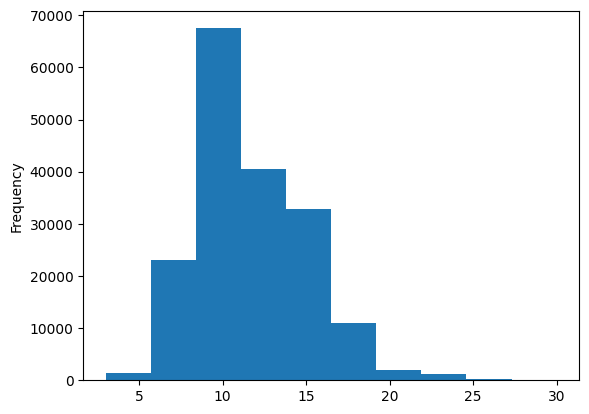

In [21]:
train_df.total_lines.plot.hist();

Dường như hầu hết các abstract dài khoảng 7 đến 15 câu.

Chúng ta nên kiểm tra những điều này để đảm bảo rằng khi chúng ta huấn luyện hoặc kiểm tra một mô hình trên các mẫu chưa biết, kết quả sẽ không kỳ lạ.

### Lấy danh sách các câu

Khi xây dựng mô hình học sâu, một trong những đầu vào chính của mô hình sẽ là list các string (các dòng của abstract).

Chúng ta có thể dễ dàng lấy những thứ này từ DataFrames của mình bằng cách gọi phương thức `tolist()` trên các cột `"text"`.

In [22]:
# Chuyển đổi các dòng văn bản abstract thành các list
train_sentences = train_df["text"].tolist()
val_sentences = val_df["text"].tolist()
test_sentences = test_df["text"].tolist()
len(train_sentences), len(val_sentences), len(test_sentences)

(180040, 30212, 30135)

In [23]:
# Xem 10 dòng đầu tiên của câu huấn luyện
train_sentences[:10]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

Chúng ta đã tách các mẫu văn bản của mình. Như bạn có thể đã đoán, chúng ta cần viết code để chuyển text thành số trước khi chúng ta có thể sử dụng nó cho các mô hình học máy, chúng ta sẽ sớm thực hiện điều này.

## Tạo nhãn dạng số (mô hình học máy cần các nhãn dạng số)

Chúng ta sẽ tạo nhãn one hot và nhãn label encoded.

Chúng ta có thể tránh được việc chỉ tạo các nhãn label encoded tuy nhiên, hàm mất mát CategoricalCrossentropy của TensorFlow thích có một nhãn được mã hóa one hot (điều này sẽ cho phép chúng ta làm mịn nhãn sau này).

Để mã hóa nhãn bằng số, chúng ta sẽ sử dụng các lớp [`OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) và [`LabelEncoder`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) của Scikit-Learn.

In [70]:
# Nhãn One hot encode
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)
train_labels_one_hot = one_hot_encoder.fit_transform(train_df["target"].to_numpy().reshape(-1, 1))
val_labels_one_hot = one_hot_encoder.transform(val_df["target"].to_numpy().reshape(-1, 1))
test_labels_one_hot = one_hot_encoder.transform(test_df["target"].to_numpy().reshape(-1, 1))

# Kiểm tra xem các nhãn huấn luyện trông như thế nào
train_labels_one_hot

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

### Label encode labels

In [25]:
# Trích xuất nhãn (cột "target") và mã hóa chúng thành số nguyên
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df["target"].to_numpy())
val_labels_encoded = label_encoder.transform(val_df["target"].to_numpy())
test_labels_encoded = label_encoder.transform(test_df["target"].to_numpy())

# Kiểm tra xem nhãn huấn luyện trông như thế nào
train_labels_encoded

array([3, 2, 2, ..., 4, 1, 1])

Chúng ta đã huấn luyện một instance của `LabelEncoder`, chúng ta có thể lấy tên lớp và số lớp bằng cách sử dụng thuộc tính `classes_`.

In [26]:
# Lấy tên lớp và số lớp từ instance LabelEncoder
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_
num_classes, class_names

(5,
 array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

## Tạo một loạt các thử nghiệm lập mô hình

Chúng ta đã xử lý dữ liệu nên bây giờ, theo quy trình máy học, cần thiết lập một loạt các thử nghiệm lập mô hình.

Hãy bắt đầu bằng cách tạo một mô hình cơ sở đơn giản để đạt được hệ số mà chúng ta sẽ cố gắng đánh bại thông qua việc xây dựng các mô hình ngày càng phức tạp hơn khi chúng ta tiến tới tái tạo mô hình chuỗi được nêu trong [*Neural networks for joint sentence
classification in medical paper abstracts*](https://arxiv.org/pdf/1612.05251.pdf).

Chúng ta sẽ huấn luyện từng mô hình trên dữ liệu huấn luyện và đánh giá chúng trên dữ liệu kiểm định.

## Model 0: Tạo mô hình cơ sở

Mô hình đầu tiên của chúng ta sẽ là TF-IDF Multinomial Naive Bayes, theo gợi ý từ [machine learning map của Scikit-Learn](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html).

Để xây dựng, chúng ta sẽ tạo `Pipeline` của Scikit-Learn, sử dụng lớp [`TfidfVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) để chuyển đổi các câu abstract thành số bằng cách sử dụng thuật toán TF-IDF, sau đó tìm hiểu cách phân loại các câu bằng cách sử dụng thuật toán [`MultinomialNB`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html).

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Tạo pipeline
model_0 = Pipeline([
  ("tf-idf", TfidfVectorizer()),
  ("clf", MultinomialNB())
])

# Khớp pipeline với dữ liệu huấn luyện
model_0.fit(X=train_sentences,
            y=train_labels_encoded);

Do tốc độ của thuật toán Multinomial Naive Bayes, nên nó huấn luyện rất nhanh.

Chúng ta có thể đánh giá độ chính xác của mô hình trên tập dữ liệu kiểm định bằng phương pháp `score()`.

In [28]:
# Đánh giá mô hình cơ sở trên tập dữ liệu kiểm định
model_0.score(X=val_sentences,
              y=val_labels_encoded)

0.7218323844829869

Có vẻ như độ chính xác 72.1% sẽ đánh bại với các mô hình sâu hơn của chúng ta.

Bây giờ, chúng ta hãy đưa ra một số dự đoán với mô hình cơ sở để đánh giá thêm về nó.

In [29]:
# Đưa ra dự đoán
baseline_preds = model_0.predict(val_sentences)
baseline_preds

array([4, 1, 3, ..., 4, 4, 1])

Để đánh giá các dự đoán của mô hình cơ sở, chúng ta sẽ import hàm `calculate_results()` mà chúng ta đã tạo trong [notebook trước](https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/08_introduction_to_nlp_in_tensorflow.ipynb) và thêm nó vào [script `helper_functions.py`](https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/helper_functions.py) để so sánh chúng với các nhãn gốc.

Cụ thể hơn, hàm `calculate_results()` sẽ giúp chúng ta có được:
* Accuracy
* Precision
* Recall
* F1-score

### Download tập lệnh hàm hỗ trợ

Hãy lấy script `helper_functions.py` đã dùng để lưu trữ các hàm hỗ trợ mà chúng ta đã tạo trong các notebook trước đây.

In [30]:
# Download tập lệnh hàm hỗ trợ
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-04-25 20:21:19--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-04-25 20:21:20 (52.7 MB/s) - ‘helper_functions.py’ saved [10246/10246]



Chúng ta đã có tập lệnh các hàm trợ giúp, hãy import hàm `caculate_results()` và xem mô hình cơ sở của chúng ta hoạt động như thế nào.

In [31]:
# Import hàm hỗ trợ calculate_results
from helper_functions import calculate_results

In [32]:
# Tạo baseline results
baseline_results = calculate_results(y_true=val_labels_encoded,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

## Chuẩn bị dữ liệu cho các mô hình chuỗi sâu

Tuyệt! Chúng ta có một mô hình cơ sở hoạt động để cố gắng cải thiện.

Nhưng trước khi bắt đầu xây dựng các mô hình sâu hơn, chúng ta cần tạo layer vectơ hóa và embedding layer.

Layer vectơ hóa sẽ chuyển đổi văn bản thành số và embedding layer sẽ nắm bắt mối quan hệ giữa các con số đó.

To start creating our vectorization and embedding layers, we'll need to import the appropriate libraries (namely TensorFlow and NumPy). Để bắt đầu tạo vectơ hóa và nhúng các lớp của chúng ta, chúng ta sẽ cần nhập các thư viện thích hợp (cụ thể là TensorFlow và NumPy).

In [33]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

Chúng ta sẽ chuyển các câu của mình thành số, nên hãy tính xem có bao nhiêu từ trong mỗi câu.

Khi mô hình đi qua các câu, nó hoạt động tốt nhất khi chúng có cùng độ dài (điều này rất quan trọng để tạo ra các batch có tensor cùng kích thước).

Ví dụ: nếu một câu dài tám từ và một câu khác dài 29 từ, chúng ta cần đệm câu tám từ bằng các số 0 để nó có cùng độ dài với câu 29 từ.

Hãy viết một ít code để tìm độ dài trung bình của các câu trong tập huấn luyện.

In [34]:
# Trung bình mỗi câu dài bao nhiêu?
sent_lens = [len(sentence.split()) for sentence in train_sentences]
avg_sent_len = np.mean(sent_lens)
avg_sent_len # trả về độ dài trung bình của câu (tính bằng token)

26.338269273494777

Vậy còn phân phối của độ dài câu?

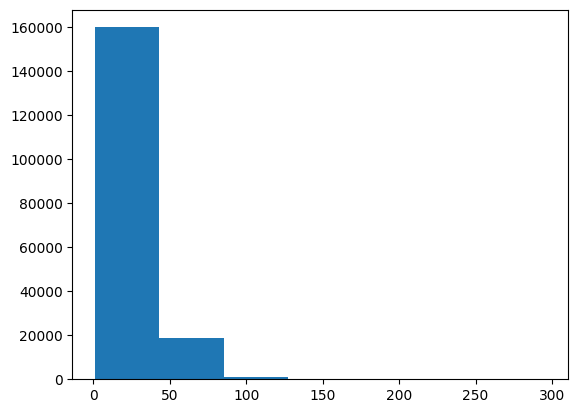

In [35]:
# Phân phối trông như thế nào?
import matplotlib.pyplot as plt
plt.hist(sent_lens, bins=7);

Có vẻ như phần lớn các câu có độ dài từ 0 đến 50 token.

Chúng ta có thể sử dụng [`percentile`](https://numpy.org/doc/stable/reference/generated/numpy.percentile.html) của NumPy để tìm giá trị chiếm 95% độ dài câu.

In [36]:
# Độ dài của câu chiếm 95% độ dài là bao nhiêu?
output_seq_len = int(np.percentile(sent_lens, 95))
output_seq_len

55

Tuyệt vời! Có vẻ như 95% các câu trong tập huấn luyện của chúng ta có độ dài từ 55 token trở xuống.

Khi tạo tokenization layer, chúng ta sẽ sử dụng giá trị này để tất cả các câu có cùng một độ dài, tức là các câu có độ dài dưới 55 sẽ được đệm 0 và các câu có độ dài trên 55 bị cắt bớt (các từ sau độ dài thứ 55 bị cắt bỏ).

> 🤔 **Câu hỏi:** Tại sao lại là 95%?

Chúng ta có thể sử dụng độ dài câu tối đa của các câu trong tập huấn luyện.

In [37]:
# Độ dài câu tối đa trong tập huấn luyện
max(sent_lens)

296

Tuy nhiên, vì hầu như không có bất kỳ câu nào dài gần với độ dài tối đa, nghĩa là phần lớn dữ liệu chúng ta chuyển đến mô hình của mình sẽ là số 0 (tất cả các câu dưới độ dài tối đa sẽ được đệm bằng số 0).

> 🔑 **Lưu ý:** Chúng ta cần trải qua các bước thực hành khi làm việc với kho ngữ liệu văn bản trong bài toán NLP. Để biết các mẫu của mình dài bao nhiêu và chúng phân bố thế nào, hãy xem phần 4 - Phân tích dữ liệu của [tài liệu PubMed 200k RCT](https://arxiv.org/pdf/1710.06071.pdf) để biết thêm chi tiết.

### Tạo text vectorizer

Bây giờ chúng ta đã có thêm một ít thông tin về văn bản, hãy tìm cách biến nó thành số.

Để thực hiện, chúng ta sẽ sử dụng layer [`TextVectorization`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/TextVectorization) từ TensorFlow.

Chúng ta sẽ giữ tất cả các tham số mặc định, ngoại trừ `max_tokens` (số từ duy nhất trong tập dữ liệu) và `output_sequence_length` (độ dài đầu ra mong muốn cho mỗi câu được vectơ hóa).

Phần 3.2 của [tài liệu PubMed 200k RCT](https://arxiv.org/pdf/1710.06071.pdf) cho biết kích thước từ vựng của tập dữ liệu PubMed 20k là 68,000. Do đó, chúng ta sẽ sử dụng nó làm tham số `max_tokens`.

In [38]:
# Có bao nhiêu từ trong từ vựng? (lấy từ phần 3.2 trong https://arxiv.org/pdf/1710.06071.pdf)
max_tokens = 68000

Do đã phát hiện ra độ dài câu là 55 chiếm 95% các câu huấn luyện, nên chúng ta sẽ sử dụng nó làm tham số `output_sequence_length`.

In [73]:
# Tạo text vectorizer
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

text_vectorizer = TextVectorization(max_tokens=max_tokens, # số từ trong vocabulary
                                    output_sequence_length=55) # độ dài đầu ra mong muốn của chuỗi được vectơ hóa

Tuyệt! Có vẻ như `text_vectorizer` đã sẵn sàng, hãy điều chỉnh nó sao cho phù hợp với dữ liệu huấn luyện (để nó đọc dữ liệu huấn luyện và tìm ra số nào biểu diễn từ nào) rồi kiểm tra.

In [73]:
# Điều chỉnh text vectorizer thành các câu huấn luyện
text_vectorizer.adapt(train_sentences)

In [73]:
# Kiểm tra text vectorizer
import random
target_sentence = random.choice(train_sentences)
print(f"Text:\n{target_sentence}")
print(f"\nLength of text: {len(target_sentence.split())}")
print(f"\nVectorized text:\n{text_vectorizer([target_sentence])}")

Chúng ta đã tìm được một cách để biến chuỗi thành số.

> 🛠 **Luyện tập:** Hãy thử chạy cell trên hàng chục lần. Bạn thấy gì về các chuỗi có độ dài nhỏ hơn 55?

Chúng ta có thể sử dụng phương thức [`get_vocabulary()`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/TextVectorization) của `text_vectorizer` để tìm ra một vài mẩu tin khác nhau về text.

In [73]:
# Có bao nhiêu từ trong training vocabulary?
rct_20k_text_vocab = text_vectorizer.get_vocabulary()
print(f"Number of words in vocabulary: {len(rct_20k_text_vocab)}"),
print(f"Most common words in the vocabulary: {rct_20k_text_vocab[:5]}")
print(f"Least common words in the vocabulary: {rct_20k_text_vocab[-5:]}")

Nếu muốn tìm cấu hình của `text_vectorizer`, chúng ta có thể sử dụng phương thức `get_config()`.

In [34]:
# Tìm cấu hình của text vectorizer
text_vectorizer.get_config()

{'name': 'text_vectorization',
 'trainable': True,
 'dtype': 'string',
 'batch_input_shape': (None,),
 'max_tokens': 68000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 55,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None,
 'encoding': 'utf-8',
 'vocabulary_size': 64841}

### Tạo text embedding tùy chỉnh

Layer `token_vectorization` ánh xạ các từ trong văn bản trực tiếp thành số. Tuy nhiên, điều này không nhất thiết phải nắm bắt được mối quan hệ giữa những con số đó.

Để văn bản biểu diễn số phong phú hơn, chúng ta có thể sử dụng **embedding**.

Khi mô hình học (bằng cách xem qua nhiều mẫu abstract và nhãn khác nhau), nó sẽ cập nhật embedding để biểu diễn tốt hơn mối quan hệ giữa các token trong kho ngữ liệu.

Chúng ta có thể tạo một embedding layer có thể huấn luyện bằng cách sử dụng layer [`Embedding`](https://www.tensorflow.org/tutorials/text/word_embeddings) của TensorFlow.

Một lần nữa, các tham số chính mà chúng ta quan tâm ở đây là các đầu vào và đầu ra của layer `Embedding`.

Tham số `input_dim` xác định kích thước từ vựng. Còn tham số `output_dim` xác định kích thước của đầu ra embedding.

Sau khi tạo, embedding layer sẽ lấy các đầu ra số nguyên của layer `text_vectorization` làm đầu vào và chuyển đổi chúng thành các vectơ đặc trưng của kích thước `output_dim`.

Hãy xem điều này thực hiện ra sao.

In [35]:
# Tạo token embedding layer
token_embed = layers.Embedding(input_dim=len(rct_20k_text_vocab), # độ dài của vocabulary
                               output_dim=128, # Lưu ý: các kích thước embedding khác nhau dẫn đến số lượng tham số để huấn luyện cũng khác nhau đáng kể
                               # Sử dụng mask để xử lý độ dài chuỗi thay đổi (tiết kiệm không gian)
                               mask_zero=True,
                               name="token_embedding")

# Hiển thị embedding mẫu
print(f"Sentence before vectorization:\n{target_sentence}\n")
vectorized_sentence = text_vectorizer([target_sentence])
print(f"Sentence after vectorization (before embedding):\n{vectorized_sentence}\n")
embedded_sentence = token_embed(vectorized_sentence)
print(f"Sentence after embedding:\n{embedded_sentence}\n")
print(f"Embedded sentence shape: {embedded_sentence.shape}")

Sentence before vectorization:
takeda pharmaceutical company limited .

Sentence after vectorization (before embedding):
[[17829  3936  5673   665     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]]

Sentence after embedding:
[[[ 0.04476373 -0.03322928  0.00848956 ... -0.00060569 -0.01594844
    0.04791384]
  [-0.03356747 -0.03633751 -0.02256564 ...  0.01724914 -0.03317723
    0.02962511]
  [ 0.0277965  -0.00327803  0.01381201 ... -0.04250677  0.02604124
   -0.01137646]
  ...
  [ 0.03327549  0.03453     0.00604204 ... -0.01221167 -0.01061781
   -0.03041684]
  [ 0.03327549  0.03453     0.00604204 ... -0.01221167 -0.01061781
   -0.03041684]
  [ 0.03327549  0.03453     0.00604204 ... -0.01221167 -0.01061781
   -0.03041684]]]

Emb

## Tạo Datasets (nhanh nhất có thể)

Chúng ta đã gặp rất nhiều khó khăn khi tiền xử lý tập dữ liệu của mình để sử dụng với mô hình học máy, tuy nhiên, vẫn có một số bước giúp chúng hoạt động nhanh hơn với mô hình.

Cụ thể, `tf.data` API cung cấp các phương pháp cho phép load dữ liệu nhanh hơn.

> 📖 **Tài liệu:** Để biết các phương pháp load dữ liệu hay nhất trong TensorFlow, hãy tham khảo:
* [tf.data: Xây dựng TensorFlow input pipelines](https://www.tensorflow.org/guide/data)
* [Chất lượng tốt hơn với tf.data API](https://www.tensorflow.org/guide/data_performance)

Bước chính mà chúng ta sẽ thực hiện với dữ liệu của mình là biến nó thành `PrefetchDataset` gồm các batch.

Như vậy, chúng ta sẽ đảm bảo TensorFlow load dữ liệu lên GPU nhanh nhất có thể, do đó thời gian huấn luyện nhanh hơn.

Để tạo `PrefetchDataset` theo batch, chúng ta có thể sử dụng các phương thức [`batch()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#batch) và [`prefetch()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#prefetch), tham số [`tf.data.AUTOTUNE`](https://www.tensorflow.org/api_docs/python/tf/data#AUTOTUNE) cũng cho phép TensorFlow xác định lượng tính toán tối ưu cần sử dụng để chuẩn bị các tập dữ liệu.

In [58]:
# Biến dữ liệu thành TensorFlow Datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot))
valid_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, val_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels_one_hot))

train_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

In [59]:
# Lấy dữ liệu của TensorSliceDataset và biến chúng thành các prefetched batch
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset = valid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

## Model 1: Conv1D với token embedding

Chúng ta đã tìm được cách để biểu diễn văn bản và nhãn bằng số, hãy xây dựng một loạt các mô hình sâu để thử cải thiện dựa trên mô hình cơ sở.

Tất cả các mô hình sâu của chúng ta đều sẽ tuân theo một cấu trúc giống nhau:

```
Input (text) -> Tokenize -> Embedding -> Layers -> Output (label probability)
```

Thành phần chính mà chúng ta sẽ thay đổi xuyên suốt là `Layers`, do bất kỳ mô hình NLP sâu hiện đại nào cũng đều yêu cầu chuyển đổi text thành embedding trước khi tìm thấy các pattern có ý nghĩa trong đó.

Mô hình đầu tiên mà chúng ta sẽ xây dựng là Mạng nơ-ron 1 chiều.

Chúng ta cũng sẽ tuân theo quy trình học máy tiêu chuẩn gồm:
- Xây dựng mô hình
- Huấn luyện mô hình
- Đánh giá mô hình (đưa ra dự đoán và so sánh với nhãn gốc)


In [38]:
# Tạo mô hình Conv1D để xử lý các chuỗi
inputs = layers.Input(shape=(1,), dtype=tf.string)
text_vectors = text_vectorizer(inputs) # vectơ hóa đầu vào text
token_embeddings = token_embed(text_vectors) # tạo embedding
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(token_embeddings)
x = layers.GlobalAveragePooling1D()(x) # cô đọng đầu ra của vectơ đặc trưng
outputs = layers.Dense(num_classes, activation="softmax")(x)
model_1 = tf.keras.Model(inputs, outputs)

# Compile
model_1.compile(loss="categorical_crossentropy", # nếu nhãn ở dạng số nguyên (không phải one hot), hãy sử dụng sparse_categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [39]:
# Lấy summary của mô hình Conv1D
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 55)                0         
 ctorization)                                                    
                                                                 
 token_embedding (Embedding  (None, 55, 128)           8299648   
 )                                                               
                                                                 
 conv1d (Conv1D)             (None, 55, 64)            41024     
                                                                 
 global_average_pooling1d (  (None, 64)                0         
 GlobalAveragePooling1D)                                         
                                                             

Tuyệt vời! Chúng ta đã xây dựng mô hình chuỗi sâu đầu tiên và nó đã sẵn sàng hoạt động.

Kiểm tra summary của mô hình, bạn sẽ nhận thấy phần lớn các tham số có thể huấn luyện nằm trong embedding layer. Nếu chúng ta tăng kích thước của embedding (bằng cách tăng tham số `output_dim` của layer `Embedding`), thì số lượng các tham số có thể huấn luyện sẽ tăng lên đáng kể.

Đã đến lúc khớp với dữ liệu huấn luyện, nhưng chúng ta sẽ thực hiện một sự thay cẩn trọng.

Vì dữ liệu huấn luyện chứa gần 200,000 câu, nên việc khớp một mô hình sâu có thể tốn một chút thời gian, ngay cả với GPU. Vì vậy, để các thử nghiệm diễn ra nhanh chóng, chúng ta sẽ chạy chúng trên một tập hợp con của tập dữ liệu huấn luyện.

Cụ thể hơn, chúng ta sẽ chỉ sử dụng 10% batch đầu tiên (khoảng 18,000 mẫu) của tập huấn luyện để huấn luyện và 10% batch đầu tiên từ tập kiểm định để kiểm định.

> 🔑 **Lưu ý:** Phương pháp tiêu chuẩn trong học máy là kiểm tra mô hình trên các tập dữ liệu con nhỏ hơn trước để đảm bảo chúng hoạt động trước khi co giãn chúng thành lượng dữ liệu lớn hơn. Bạn nên đặt mục tiêu chạy nhiều thử nghiệm nhỏ hơn thay vì chỉ chạy một ít các thử nghiệm lớn. Và vì thời gian có hạn, nên một trong những cách tốt nhất để chạy các thử nghiệm nhỏ hơn là giảm lượng dữ liệu bạn đang làm việc (10% tập dữ liệu đầy đủ thường là một số lượng tốt, miễn là nó gồm phân phối tương tự) .

In [40]:
# Khớp mô hình
model_1_history = model_1.fit(train_dataset,
                              steps_per_epoch=int(0.1 * len(train_dataset)), # chỉ khớp trên 10% của batch để thời gian huấn luyện nhanh hơn
                              epochs=3,
                              validation_data=valid_dataset,
                              validation_steps=int(0.1 * len(valid_dataset))) # chỉ kiểm định trên 10% của batch

Epoch 1/3
562/562 [==============================] - 23s 36ms/step - loss: 0.9121 - accuracy: 0.6413 - val_loss: 0.6820 - val_accuracy: 0.7394
Epoch 2/3
562/562 [==============================] - 6s 10ms/step - loss: 0.6571 - accuracy: 0.7559 - val_loss: 0.6312 - val_accuracy: 0.7666
Epoch 3/3
562/562 [==============================] - 4s 8ms/step - loss: 0.6184 - accuracy: 0.7721 - val_loss: 0.5976 - val_accuracy: 0.7842


Chúng ta đã huấn luyện mô hình chuỗi sâu đầu tiên và không mất quá nhiều thời gian (và nếu chúng ta không nạp sớm dữ liệu theo batch, thì sẽ tốn nhiều thời gian hơn).

Đã đến lúc đưa ra một số dự đoán với mô hình, sau đó đánh giá chúng.

In [41]:
# Đánh giá trên toàn bộ tập dữ liệu kiểm định (chúng ta chỉ kiểm định trên 10% của batch trong quá trình huấn luyện)
model_1.evaluate(valid_dataset)

945/945 [==============================] - 4s 4ms/step - loss: 0.6003 - accuracy: 0.7849


[0.6003116369247437, 0.7848867774009705]

In [42]:
# Đưa ra dự đoán (mô hình đưa ra xác suất dự đoán cho từng lớp)
model_1_pred_probs = model_1.predict(valid_dataset)
model_1_pred_probs

945/945 [==============================] - 2s 2ms/step


array([[4.1857722e-01, 1.6655263e-01, 7.7015512e-02, 3.1272170e-01,
        2.5132991e-02],
       [4.8073122e-01, 2.4756248e-01, 1.6841184e-02, 2.4728136e-01,
        7.5836959e-03],
       [1.5793258e-01, 6.1282450e-03, 1.8928630e-03, 8.3400548e-01,
        4.0816703e-05],
       ...,
       [2.9522437e-06, 5.5801071e-04, 5.0885696e-04, 3.1215025e-06,
        9.9892706e-01],
       [5.3374551e-02, 4.6663949e-01, 1.0014725e-01, 6.0478862e-02,
        3.1935984e-01],
       [1.6403173e-01, 6.7323065e-01, 4.8763931e-02, 4.0507521e-02,
        7.3466122e-02]], dtype=float32)

In [43]:
# Chuyển đổi pred probs thành các lớp
model_1_preds = tf.argmax(model_1_pred_probs, axis=1)
model_1_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 1, 1])>

In [44]:
# Tính model_1 results
model_1_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 78.48867999470409,
 'precision': 0.7815196913998468,
 'recall': 0.7848867999470409,
 'f1': 0.7821687722807069}

## Model 2: Feature extraction với pretrained token embeddings

Quá trình huấn luyện embedding tốn một chút thời gian, làm chậm quá trình thử nghiệm.

Vì chúng ta đang hướng tới việc tái tạo kiến ​​trúc mô hình trong [*Neural Networks for Joint Sentence Classification
in Medical Paper Abstracts*](https://arxiv.org/pdf/1612.05251.pdf), nó đề cập đến việc họ đã sử dụng [pretrained GloVe embedding](https://nlp.stanford.edu/projects/glove/) là cách để khởi tạo token embedding.

Để mô phỏng điều này, hãy xem chúng ta có thể nhận được kết quả gì với [pretrained Universal Sentence Encoder embeddings từ TensorFlow Hub](https://tfhub.dev/google/universal-sentence-encoder/4).

> 🔑 **Lưu ý:** Chúng ta có thể sử dụng GloVe embeddings nhưng vì chúng ta đang làm việc với TensorFlow nên hãy sử dụng những gì có sẵn từ TensorFlow Hub (không sử dụng GloVe embeddings). Chúng ta sẽ sử dụng [pretrained GloVe embeddings](https://keras.io/examples/nlp/pretrained_word_embeddings/) làm tiện ích mở rộng.

Cấu trúc mô hình như sau:

```
Inputs (string) -> Pretrained embeddings from TensorFlow Hub (Universal Sentence Encoder) -> Layers -> Output (prediction probabilities)
```

Bạn sẽ nhận thấy thiếu tokenization layer mà chúng ta đã sử dụng trong mô hình trước đó. Đó là do Universal Sentence Encoder (USE) (USE) để ý tokenization giúp chúng ta.

Loại mô hình này được gọi là transfer learning, hay cụ thể hơn là **feature extraction transfer learning**. Nói cách khác là lấy các pattern mà mô hình đã học ở nơi khác và áp dụng nó vào bài toán của chúng ta.

![TensorFlow Hub Universal Feature Encoder feature extractor model we're building](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/09-model-tf-hub-USE-to-dense-layer.png)
*Mô hình feature extractor mà chúng ta đang xây dựng bằng cách sử dụng pretrained embedding từ TensorFlow Hub.*

Để download pretrained USE vào một layer mà chúng ta có thể sử dụng trong mô hình của mình, hãy sử dụng lớp [`hub.KerasLayer`](https://www.tensorflow.org/hub/api_docs/python/hub/KerasLayer).

Chúng ta sẽ đóng băng các pretrained embedding (bằng cách đặt `trainable=False`) và thêm một vài layer có thể huấn luyện ở trên cùng để điều chỉnh kết quả đầu ra của mô hình cho phù hợp với dữ liệu.

> 🔑 **Lưu ý:** Do phải download một mô hình tương đối lớn (~916MB), cell bên dưới sẽ tốn một chút thời gian để chạy.

In [53]:
# Download pretrained TensorFlow Hub USE
import tensorflow_hub as hub
tf_hub_embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False,
                                        name="universal_sentence_encoder")

Tuyệt, giờ thì pretrained USE đã được download và khởi tạo thành `hub.KerasLayer` instance, hãy thử nghiệm nó với một câu ngẫu nhiên.

In [54]:
# Thử embedding trong một câu ngẫu nhiên
random_training_sentence = random.choice(train_sentences)
print(f"Random training sentence:\n{random_training_sentence}\n")
use_embedded_sentence = tf_hub_embedding_layer([random_training_sentence])
print(f"Sentence after embedding:\n{use_embedded_sentence[0][:30]} (truncated output)...\n")
print(f"Length of sentence embedding:\n{len(use_embedded_sentence[0])}")

Random training sentence:
however , the importance of hba@c levels in non-diabetic hemodialysis patients still remains unknown .

Sentence after embedding:
[-0.0253307  -0.01887891 -0.01189794 -0.00981611 -0.02024686 -0.04642649
 -0.00231073  0.03055623 -0.03255438 -0.01853155  0.09475243  0.05206143
 -0.05997394  0.01325     0.02280689  0.04368838 -0.09115606 -0.04400631
 -0.00945454  0.00639337  0.03461519  0.09896018  0.03698841 -0.03704375
 -0.06712282  0.03827774 -0.03434551  0.00877917  0.02861711 -0.05306597] (truncated output)...

Length of sentence embedding:
512


Như chúng ta đã đề cập trước đây, mô-đun pretrained USE từ TensorFlow Hub sẽ đảm nhận việc tokenize text cho chúng ta và xuất ra một vectơ embedding 512 chiều.

Hãy tập hợp lại và biên dịch mô hình bằng cách sử dụng `tf_hub_embedding_layer`.

### Xây dựng và khớp mô hình NLP feature extraction từ TensorFlow Hub

In [55]:
# Định nghĩa mô hình feature extractor sử dụng TF Hub layer
inputs = layers.Input(shape=[], dtype=tf.string)
pretrained_embedding = tf_hub_embedding_layer(inputs) # tokenize text và tạo embedding
x = layers.Dense(128, activation="relu")(pretrained_embedding) # thêm một layer được kết nối đầy đủ lên đầu của embedding
# Lưu ý: chúng ta có thể thêm nhiều layer ở đây nếu muốn
outputs = layers.Dense(5, activation="softmax")(x) # tạo layer đầu ra
model_2 = tf.keras.Model(inputs=inputs,
                        outputs=outputs)

# Biên dịch mô hình
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [56]:
# Lấy summary của mô hình
model_2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None,)]                 0         
                                                                 
 universal_sentence_encoder  (None, 512)               256797824 
  (KerasLayer)                                                   
                                                                 
 dense (Dense)               (None, 128)               65664     
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                                 
Total params: 256864133 (979.86 MB)
Trainable params: 66309 (259.02 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


Kiểm tra summary của mô hình, chúng ta có thể thấy có rất nhiều tham số, tuy nhiên, phần lớn tham số trong số này không thể huấn luyện. Đó là do chúng ta đặt `training=False` khi khởi tạo layer USE feature extractor.

Vì vậy, khi huấn luyện mô hình, chỉ có hai layer đầu ra trên cùng được huấn luyện.

In [60]:
# Khớp mô hình feature extractor cho 3 epoch
model_2.fit(train_dataset,
            steps_per_epoch=int(0.1 * len(train_dataset)),
            epochs=3,
            validation_data=valid_dataset,
            validation_steps=int(0.1 * len(valid_dataset)))

Epoch 1/3


Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x7ab5890abf40>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x7ab5890abf40>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
560/562 [============================>.] - ETA: 0s - loss: 0.9224 - accuracy: 0.6451

Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x7ab592da5990>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x7ab592da5990>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
562/562 [==============================] - 17s 24ms/step - loss: 0.9212 - accuracy: 0.6455 - val_loss: 0.7974 - val_accuracy: 0.6932
Epoch 2/3
562/562 [==============================] - 11s 19ms/step - loss: 0.7683 - accuracy: 0.7006 - val_loss: 0.7545 - val_accuracy: 0.7098
Epoch 3/3
562/562 [==============================] - 20s 35ms/step - loss: 0.7516 - accuracy: 0.7135 - val_loss: 0.7393 - val_accuracy: 0.7134


In [50]:
# Đánh giá trên toàn bộ tập dữ liệu kiểm định
model_2.evaluate(valid_dataset)

945/945 [==============================] - 17s 18ms/step - loss: 0.7404 - accuracy: 0.7132


[0.740410327911377, 0.7131603360176086]

Vì chúng ta không huấn luyện embedding layer tùy chỉnh của riêng mình nên việc huấn luyện diễn ra nhanh hơn nhiều.

Hãy đưa ra một số dự đoán và đánh giá mô hình feature extraction.

In [51]:
# Đưa ra dự đoán với mô hình feature extraction
model_2_pred_probs = model_2.predict(valid_dataset)
model_2_pred_probs

945/945 [==============================] - 10s 10ms/step


array([[0.41001463, 0.38946247, 0.00282992, 0.18936774, 0.00832526],
       [0.30795592, 0.5364835 , 0.00385591, 0.14856893, 0.00313566],
       [0.25254613, 0.1442869 , 0.02046527, 0.5451612 , 0.03754051],
       ...,
       [0.00273995, 0.00719714, 0.05709486, 0.00098676, 0.9319813 ],
       [0.0037186 , 0.04574525, 0.19262633, 0.00140276, 0.75650704],
       [0.17138503, 0.2666274 , 0.49691465, 0.00695244, 0.05812051]],
      dtype=float32)

In [52]:
# Chuyển đổi dự đoán với mô hình feature extraction thành các lớp
model_2_preds = tf.argmax(model_2_pred_probs, axis=1)
model_2_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 4, 2])>

In [53]:
# Tính kết quả từ TF Hub pretrained embeddings results trên tập kiểm định
model_2_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_2_preds)
model_2_results

{'accuracy': 71.31603336422614,
 'precision': 0.7131040462032938,
 'recall': 0.7131603336422614,
 'f1': 0.7101883096114838}

## Model 3: Conv1D với character embeddings



### Tạo tokenizer ở cấp ký tự

Tài liệu  [*Neural Networks for Joint Sentence Classification
in Medical Paper Abstracts*](https://arxiv.org/pdf/1612.05251.pdf) đã đề cập rằng mô hình của họ sử dụng kết hợp token và character embedding.

Chúng ta đã xây dựng mô hình với token embedding tùy chỉnh và pretrained token embedding, sao chúng ta tạo mô hình bằng character embedding?

Sự khác biệt giữa character embedding và token embedding là **character embedding** được tạo bằng cách sử dụng các chuỗi được chia ra thành các ký tự (ví dụ: `hello` -> [`h`, `e`, `l`, `l`, `o`]) trong khi đó, **token embedding** được tạo ra dựa trên các chuỗi được chia thành các token.

![example of difference between token level and character level embeddings](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/09-token-vs-character-embeddings.png)
*Token level embedding phân tách chuỗi thành các token (từ) và nhúng từng chuỗi trong số đó, character embedding tách chuỗi thành các ký tự và tạo một vectơ đặc trưng cho mỗi ký tự.*

Chúng ta có thể tạo embedding ở cấp độ ký tự bằng cách vectơ hóa các chuỗi trước tiên (sau khi chúng đã được chia thành các ký tự) bằng cách sử dụng lớp [`TextVectorization`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/TextVectorization), sau đó truyền các chuỗi được vectơ hóa đó qua layer [`Embedding`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding).

Trước khi vectơ hóa các chuỗi ở cấp độ ký tự, chúng ta cần chia chúng thành các ký tự. Hãy viết một hàm để thực hiện như vậy.

In [54]:
# Tạo hàm để tách câu thành các ký tự
def split_chars(text):
  return " ".join(list(text))

# Thử nghiệm tách chuỗi không ở cấp độ ký tự thành các ký tự
split_chars(random_training_sentence)

't e n   w e e k s   f o l l o w i n g   s r p   ,   m e a n   p p d   d e c r e a s e s   w e r e   @   m m   f o r   t h e   t e s t   g r o u p   a n d   @   m m   f o r   t h e   c o n t r o l   ,   a n d   m e a n   b i   r e d u c t i o n s   w e r e   @   f o r   t h e   t e s t   g r o u p   a n d   @   f o r   t h e   c o n t r o l   .'

Tuyệt vời! Có vẻ như hàm tách ký tự của chúng ta đã hoạt động. Hãy tạo tập dữ liệu cấp độ ký tự bằng cách tách tập dữ liệu chuỗi của chúng ta thành các ký tự.

In [55]:
# Phân tách dữ liệu ở cấp độ chuỗi thành phân tách dữ liệu ở cấp độ ký tự
train_chars = [split_chars(sentence) for sentence in train_sentences]
val_chars = [split_chars(sentence) for sentence in val_sentences]
test_chars = [split_chars(sentence) for sentence in test_sentences]
print(train_chars[0])

t o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .


Để tìm độ dài của chuỗi ký tự được vectơ hóa, hãy kiểm tra phân phối độ dài chuỗi ký tự.

In [56]:
# Độ dài ký tự trung bình là bao nhiêu?
char_lens = [len(sentence) for sentence in train_sentences]
mean_char_len = np.mean(char_lens)
mean_char_len

149.3662574983337

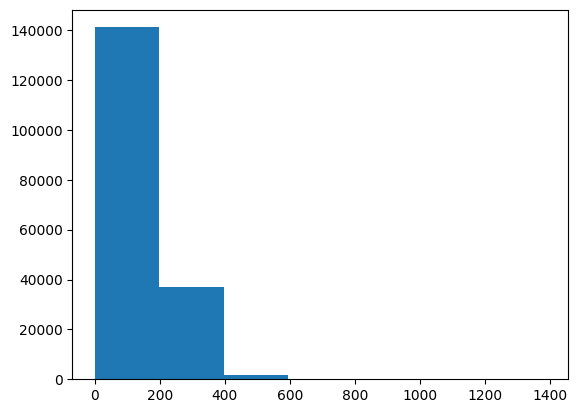

In [57]:
# Kiểm tra phân phối của các chuỗi ở cấp độ ký tự
import matplotlib.pyplot as plt
plt.hist(char_lens, bins=7);

Có vẻ hầu hết các chuỗi của chúng ta dài từ 0 đến 200 ký tự.

Hãy sử dụng percentile của NumPy để tìm ra độ dài chiếm 95% chuỗi.

In [58]:
# Tìm độ dài ký tự chiếm 95% chuỗi
output_seq_char_len = int(np.percentile(char_lens, 95))
output_seq_char_len

290

Chúng ta đã biết độ dài chuỗi chiếm 95% chuỗi, hãy sử dụng độ dài đó trong layer `TextVectorization` làm tham số `output_sequence_length`.

> 🔑 **Lưu ý:** Chúng ta có thể thử nghiệm ở đây để tìm `output_sequence_length` tối ưu là bao nhiêu, có lẽ sử dụng giá trị trung bình sẽ cho kết quả tốt như sử dụng percentile 95%.

Chúng ta sẽ đặt `max_tokens` (tổng số ký tự khác nhau trong chuỗi) thành 28, hay nói cách khác là 26 chữ cái trong bảng chữ cái + dấu cách + token OOV (hết từ vựng hoặc từ không xác định).

In [59]:
# Lấy tất cả các ký tự từ bàn phím cho char-level embedding
import string
alphabet = string.ascii_lowercase + string.digits + string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [60]:
# Tạo char-level token vectorizer instance
NUM_CHAR_TOKENS = len(alphabet) + 2 # số ký tự trong bảng chữ cái + dấu cách + OOV token
char_vectorizer = TextVectorization(max_tokens=NUM_CHAR_TOKENS,
                                    output_sequence_length=output_seq_char_len,
                                    standardize="lower_and_strip_punctuation",
                                    name="char_vectorizer")

# Điều chỉnh character vectorizer để huấn luyện ký tự
char_vectorizer.adapt(train_chars)

Chúng ta đã điều chỉnh `char_vectorizer` với các chuỗi cấp độ ký tự, hãy kiểm tra một số đặc điểm về nó bằng phương thức [`get_vocabulary()`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/TextVectorization#get_vocabulary).

In [61]:
# Kiểm tra đặc điểm của character vocabulary
char_vocab = char_vectorizer.get_vocabulary()
print(f"Number of different characters in character vocab: {len(char_vocab)}")
print(f"5 most common characters: {char_vocab[:5]}")
print(f"5 least common characters: {char_vocab[-5:]}")

Number of different characters in character vocab: 28
5 most common characters: ['', '[UNK]', 'e', 't', 'i']
5 least common characters: ['k', 'x', 'z', 'q', 'j']


Chúng ta cũng có thể kiểm tra nó trên các chuỗi ký tự ngẫu nhiên để đảm bảo nó đang hoạt động.

In [62]:
# Kiểm tra character vectorizer
random_train_chars = random.choice(train_chars)
print(f"Charified text:\n{random_train_chars}")
print(f"\nLength of chars: {len(random_train_chars.split())}")
vectorized_chars = char_vectorizer([random_train_chars])
print(f"\nVectorized chars:\n{vectorized_chars}")
print(f"\nLength of vectorized chars: {len(vectorized_chars[0])}")

Charified text:
b e t w e e n   j a n   @   ,   @   ,   a n d   o c t   @   ,   @   ,   @   p a t i e n t s   w e r e   r a n d o m l y   a s s i g n e d   t o   r e c e i v e   i b a n d r o n i c   a c i d   a n d   @   t o   r e c e i v e   z o l e d r o n i c   a c i d   ;   t h r e e   p a t i e n t s   w i t h d r e w   i m m e d i a t e l y   a f t e r   r a n d o m i s a t i o n   .

Length of chars: 155

Vectorized chars:
[[22  2  3 20  2  2  6 27  5  6  5  6 10  7 11  3 14  5  3  4  2  6  3  9
  20  2  8  2  8  5  6 10  7 15 12 19  5  9  9  4 18  6  2 10  3  7  8  2
  11  2  4 21  2  4 22  5  6 10  8  7  6  4 11  5 11  4 10  5  6 10  3  7
   8  2 11  2  4 21  2 25  7 12  2 10  8  7  6  4 11  5 11  4 10  3 13  8
   2  2 14  5  3  4  2  6  3  9 20  4  3 13 10  8  2 20  4 15 15  2 10  4
   5  3  2 12 19  5 17  3  2  8  8  5  6 10  7 15  4  9  5  3  4  7  6  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 

Bạn sẽ nhận thấy các chuỗi có độ dài ngắn hơn 290 (`output_seq_char_length`) được đệm bằng các số không ở cuối, điều này đảm bảo tất cả các chuỗi được chuyển đến mô hình của chúng ta đều có cùng độ dài.

Ngoài ra, do tham số `standardize` của `TextVectorization` là `"lower_and_strip_punctuation"` và tham số `split` là `"whitespace"` theo mặc định, nên các ký hiệu (chẳng hạn như `@`) và dấu cách sẽ bị xóa.

> 🔑 **Lưu ý:** Nếu không muốn xóa dấu chấm câu (giữ nguyên `@`, `%`,...), chúng ta có thể tạo một hàm chuẩn hóa tùy chỉnh và truyền nó làm tham số `standardize`. Xem tài liệu về lớp [`TextVectorization`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/TextVectorization) để tìm hiểu thêm.


### Tạo embedding ở cấp độ ký tự
Chúng ta đã có một cách để vectơ hóa chuỗi cấp độ ký tự, bây giờ hãy tạo embedding ở cấp độ ký tự.

Cũng giống như token embedding tùy chỉnh, chúng ta có thể thực hiện như vậy bằng cách sử dụng lớp [`tensorflow.keras.layers.Embedding`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding).

Layer embedding ở cấp độ ký tự yêu cầu chiều đầu vào và chiều đầu ra.

Chiều đầu vào (`input_dim`) bằng số ký tự khác nhau trong `char_vocab` (28). Và vì chúng ta đang theo cấu trúc mô hình trong Hình 1 của [*Neural Networks for Joint Sentence Classification
in Medical Paper Abstracts*](https://arxiv.org/pdf/1612.05251.pdf), nên chiều đầu ra của character embedding (`output_dim`) sẽ là 25.

In [63]:
# Tạo char embedding layer
char_embed = layers.Embedding(input_dim=NUM_CHAR_TOKENS, # số lượng ký tự khác nhau
                              output_dim=25, # kích thước embedding của mỗi ký tự (giống như Hình 1 trong https://arxiv.org/pdf/1612.05251.pdf)
                              mask_zero=False, # không sử dụng mask (điều này sẽ làm rối tung model_5 nếu được đặt thành True)
                              name="char_embed")

# Kiểm tra character embedding layer
print(f"Charified text (before vectorization and embedding):\n{random_train_chars}\n")
char_embed_example = char_embed(char_vectorizer([random_train_chars]))
print(f"Embedded chars (after vectorization and embedding):\n{char_embed_example}\n")
print(f"Character embedding shape: {char_embed_example.shape}")

Charified text (before vectorization and embedding):
b e t w e e n   j a n   @   ,   @   ,   a n d   o c t   @   ,   @   ,   @   p a t i e n t s   w e r e   r a n d o m l y   a s s i g n e d   t o   r e c e i v e   i b a n d r o n i c   a c i d   a n d   @   t o   r e c e i v e   z o l e d r o n i c   a c i d   ;   t h r e e   p a t i e n t s   w i t h d r e w   i m m e d i a t e l y   a f t e r   r a n d o m i s a t i o n   .

Embedded chars (after vectorization and embedding):
[[[-9.4903335e-03 -9.6510425e-03  9.2991963e-03 ... -4.3320693e-02
    2.6563812e-02  7.8987330e-05]
  [-3.1677365e-02 -4.5098282e-02 -2.6358044e-02 ... -3.6749206e-02
    4.4645999e-02 -4.8440147e-02]
  [ 1.1584915e-02  1.3810981e-02  3.8431857e-02 ...  1.9230973e-02
   -4.6008181e-02  2.2861194e-02]
  ...
  [-7.0110187e-03 -3.1302169e-02 -2.7032018e-02 ...  1.9466553e-02
   -3.7556041e-02 -1.5443217e-02]
  [-7.0110187e-03 -3.1302169e-02 -2.7032018e-02 ...  1.9466553e-02
   -3.7556041e-02 -1.5443217e-02]
  [-7

Tuyệt vời! Mỗi ký tự trong chuỗi biến thành một embedding 25 chiều.


### Xây dựng mô hình Conv1D để khớp với character embeddings
Chúng ta đã tìm ra cách để biến các chuỗi ở cấp độ độ ký tự thành số (`char_vectorizer`) cũng như biểu diễn chúng bằng số dưới dạng embedding (`char_embed`), hãy kiểm tra mức độ hiệu quả của chúng trong việc mã hóa thông tin trong chuỗi bằng cách tạo mô hình chuỗi ở cấp độ ký tự.

Mô hình có cấu trúc giống như mô hình token embedding tùy chỉnh (`model_1`), trừ việc nó sẽ lấy chuỗi ở cấp độ ký tự làm đầu vào thay vì chuỗi ở cấp độ token.

```
Input (character-level text) -> Tokenize -> Embedding -> Layers (Conv1D, GlobalMaxPool1D) -> Output (label probability)
```


In [64]:
# Tạo Conv1D chỉ ở cấp độ ký tự
inputs = layers.Input(shape=(1,), dtype="string")
char_vectors = char_vectorizer(inputs)
char_embeddings = char_embed(char_vectors)
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(char_embeddings)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)
model_3 = tf.keras.Model(inputs=inputs,
                         outputs=outputs,
                         name="model_3_conv1D_char_embedding")

# Biên dịch mô hình
model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [65]:
# Kiểm tra summary của conv1d_char_model
model_3.summary()

Model: "model_3_conv1D_char_embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 char_vectorizer (TextVecto  (None, 290)               0         
 rization)                                                       
                                                                 
 char_embed (Embedding)      (None, 290, 25)           1750      
                                                                 
 conv1d_1 (Conv1D)           (None, 290, 64)           8064      
                                                                 
 global_max_pooling1d (Glob  (None, 64)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense_3 (Dense)             (None, 5

Trước khi khớp mô hình trên dữ liệu, hãy tạo `PrefetchedDataset` theo batch ở cấp độ kí tự.

In [66]:
# Tạo char datasets
train_char_dataset = tf.data.Dataset.from_tensor_slices((train_chars, train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset = tf.data.Dataset.from_tensor_slices((val_chars, val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

train_char_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

Cũng giống như mô hình chuỗi ở cấp độ token, để tiết kiệm thời gian cho các thử nghiệm, chúng ta sẽ khớp mô hình ở cấp độ ký tự trên 10% batch.

In [67]:
# Khớp mô hình chỉ ở cấp độ ký tự
model_3_history = model_3.fit(train_char_dataset,
                              steps_per_epoch=int(0.1 * len(train_char_dataset)),
                              epochs=3,
                              validation_data=val_char_dataset,
                              validation_steps=int(0.1 * len(val_char_dataset)))

Epoch 1/3
562/562 [==============================] - 4s 6ms/step - loss: 1.2702 - accuracy: 0.4912 - val_loss: 1.0380 - val_accuracy: 0.5971
Epoch 2/3
562/562 [==============================] - 3s 5ms/step - loss: 1.0020 - accuracy: 0.6015 - val_loss: 0.9321 - val_accuracy: 0.6293
Epoch 3/3
562/562 [==============================] - 4s 7ms/step - loss: 0.9334 - accuracy: 0.6376 - val_loss: 0.8676 - val_accuracy: 0.6662


In [68]:
# Đánh giá model_3 trên toàn bộ validation char dataset
model_3.evaluate(val_char_dataset)

945/945 [==============================] - 3s 4ms/step - loss: 0.8926 - accuracy: 0.6549


[0.8925710320472717, 0.6549384593963623]

Có vẻ mô hình ở cấp độ ký tự đang hoạt động, hãy đưa ra một số dự đoán và đánh giá chúng.

In [69]:
# Đưa ra dự đoán chỉ với mô hình ở cấp độ ký tự
model_3_pred_probs = model_3.predict(val_char_dataset)
model_3_pred_probs

945/945 [==============================] - 2s 2ms/step


array([[0.28336176, 0.31448272, 0.15100993, 0.20949791, 0.04164768],
       [0.17197569, 0.49894497, 0.03855428, 0.1808553 , 0.10966973],
       [0.1323155 , 0.37018028, 0.29700935, 0.09217643, 0.10831847],
       ...,
       [0.02371008, 0.05704813, 0.20280974, 0.06676803, 0.64966404],
       [0.05967094, 0.23973586, 0.28164133, 0.03731812, 0.3816337 ],
       [0.47802716, 0.33146662, 0.11755098, 0.06003104, 0.01292429]],
      dtype=float32)

In [70]:
# Chuyển đổi dự đoán thành lớp
model_3_preds = tf.argmax(model_3_pred_probs, axis=1)
model_3_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([1, 1, 1, ..., 4, 4, 0])>

In [71]:
# Tính kết quả chỉ của của mô hình Conv1D ký tự
model_3_results = calculate_results(y_true=val_labels_encoded,
                                        y_pred=model_3_preds)
model_3_results

{'accuracy': 65.4938435058917,
 'precision': 0.6477582018285247,
 'recall': 0.654938435058917,
 'f1': 0.6442216249440625}

## Model 4: Kết hợp pretrained token embeddings + character embeddings (hybrid embedding layer)

Bây giờ mọi thứ đang trở nên thú vị.

Khi tiến gần hơn đến việc xây dựng một mô hình tương tự như mô hình trong Hình 1 của [*Neural Networks for Joint Sentence Classification
in Medical Paper Abstracts*](https://arxiv.org/pdf/1612.05251.pdf), đã đến lúc chúng ta xử lý hybrid token embedding layer mà họ nói tới.

Hybrid token embedding layer này là sự kết hợp giữa token embedding và character embedding. Nói cách khác, chúng tạo ra một embedding xếp chồng lên nhau để biểu diễn chuỗi trước khi truyền chúng tới sequence label prediction layer.

Cho tới giờ, chúng ta đã xây dựng hai mô hình sử dụng token ở cấp độ token và cấp độ ký tự; tuy nhiên, hai mô hình này sử dụng riêng từng embedding.

Để bắt đầu tái tạo (hoặc sắp tái tạo) mô hình trong Hình 1, chúng ta sẽ thực hiện các bước sau:
1. Tạo mô hình ở cấp độ token (tương tự embedding)
2. Tạo mô hình ở cấp độ ký tự (tương tự `model_3` với một chút sửa đổi để so sánh với tài liệu)
3. Kết hợp (sử dụng [`layers.Concatenate`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Concatenate)) các  đầu ra của 1 và 2
4. Xây dựng một loạt các layer đầu ra trên cùng của 3 layer tương tự như Hình 1 và phần 4.2 của [*Neural Networks for Joint Sentence Classification
in Medical Paper Abstracts*](https://arxiv.org/pdf/1612.05251.pdf)
5. Xây dựng một mô hình lấy chuỗi ở cấp độ ký tự và token làm đầu vào và tạo ra xác suất nhãn chuỗi làm đầu ra

In [72]:
# 1. Thiết lập token inputs/model
token_inputs = layers.Input(shape=[], dtype=tf.string, name="token_input")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_output = layers.Dense(128, activation="relu")(token_embeddings)
token_model = tf.keras.Model(inputs=token_inputs,
                             outputs=token_output)

# 2. Thiết lập char inputs/model
char_inputs = layers.Input(shape=(1,), dtype=tf.string, name="char_input")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(25))(char_embeddings) # bi-LSTM hiển thị trong Hình 1 của https://arxiv.org/pdf/1612.05251.pdf
char_model = tf.keras.Model(inputs=char_inputs,
                            outputs=char_bi_lstm)

# 3. Nối token và char inputs (tạo hybrid token embedding)
token_char_concat = layers.Concatenate(name="token_char_hybrid")([token_model.output,
                                                                  char_model.output])

# 4. Tạo layer đầu ra - thêm vào dropout đã bàn trong 4.2 của https://arxiv.org/pdf/1612.05251.pdf
combined_dropout = layers.Dropout(0.5)(token_char_concat)
combined_dense = layers.Dense(200, activation="relu")(combined_dropout) # hơi khác so với Hình 1 do shape khác nhau của các token/char embedding layer
final_dropout = layers.Dropout(0.5)(combined_dense)
output_layer = layers.Dense(num_classes, activation="softmax")(final_dropout)

# 5. Xây dựng mô hình với char và token inputs
model_4 = tf.keras.Model(inputs=[token_model.input, char_model.input],
                         outputs=output_layer,
                         name="model_4_token_and_char_embeddings")

Có rất nhiều thứ đang diễn ra ở đây, hãy lấy summary và vẽ sơ đồ mô hình của chúng ta để hình dung những gì đang xảy ra.

In [73]:
# Lấy summary của mô hình token và character
model_4.summary()

Model: "model_4_token_and_char_embeddings"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 char_input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 token_input (InputLayer)    [(None,)]                    0         []                            
                                                                                                  
 char_vectorizer (TextVecto  (None, 290)                  0         ['char_input[0][0]']          
 rization)                                                                                        
                                                                                                  
 universal_sentence_encoder  (None, 512)                  2567978 

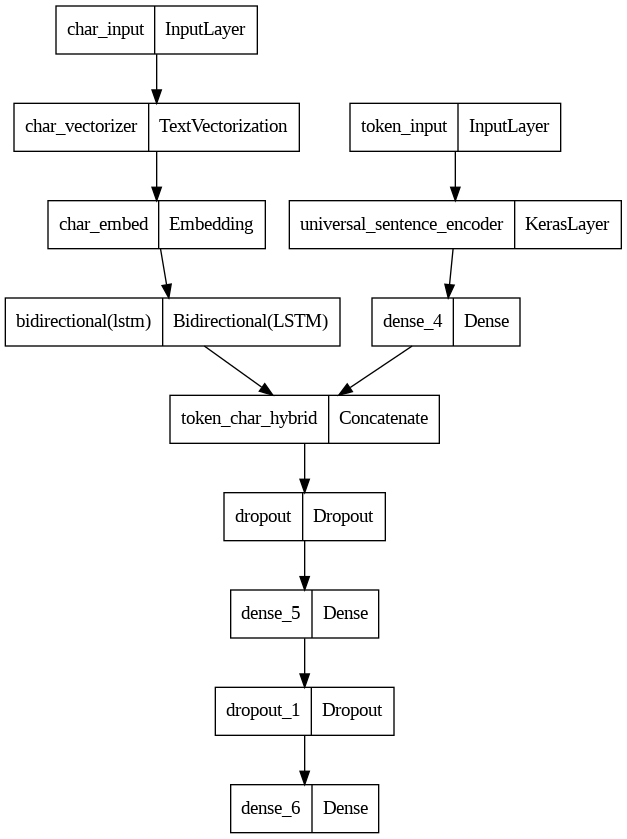

In [74]:
# Vẽ mô hình hybrid token và character
from tensorflow.keras.utils import plot_model
plot_model(model_4)

Bây giờ mô hình đó trông khá tốt. Hãy biên dịch nó cũng như các mô hình còn lại.

> 🔑 **Lưu ý:** Phần 4.2 của [*Neural Networks for Joint Sentence Classification
in Medical Paper Abstracts*](https://arxiv.org/pdf/1612.05251.pdf) đề cập đến việc sử dụng SGD (stochastic gradient descent) optimizer, tuy nhiên, để nhất quán với các mô hình khác, chúng ta sẽ sử dụng Adam optimizer. Chúng ta có thể thử sử dụng [`tf.keras.optimizers.SGD`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) thay vì [`tf.keras.optimizers.Adam`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) và so sánh các kết quả với nhau.

In [75]:
# Biên dịch mô hình token char
model_4.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(), # phần 4.2 của https://arxiv.org/pdf/1612.05251.pdf đề cập tới việc sử dụng SGD nhưng chúng ta vẫn sẽ dùng Adam
                metrics=["accuracy"])

Một lần nữa, để các thử nghiệm diễn ra nhanh chóng, chúng ta sẽ khớp mô hình token-character-hybrid trên 10% huấn luyện và kiểm định trên 10% batch kiểm định. Tuy nhiên, khác biệt ở mô hình này là nó yêu cầu hai đầu vào, chuỗi ở cấp độ token và chuỗi ở cấp độ ký tự.

Chúng ta có thể thực hiện điều này bằng cách tạo `tf.data.Dataset` với một tuple vì nó là đầu vào đầu tiên, chẳng hạn:
* `((token_data, char_data), (label))`

Hãy xem điều này hoạt động thế nào.

### Kết hợp dữ liệu token và dữ liệu ký tự thành `tf.data` dataset

In [76]:
# Kết hợp chars và tokens thành một dataset
train_char_token_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars)) # tạo dữ liệu
train_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot) # tạo nhãn
train_char_token_dataset = tf.data.Dataset.zip((train_char_token_data, train_char_token_labels)) # kết hợp dữ liệu và nhãn

# Dữ liệu prefetch và batch train
train_char_token_dataset = train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

# Lặp lại các bước tương tự với dữ liệu kiểm định
val_char_token_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars))
val_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_char_token_dataset = tf.data.Dataset.zip((val_char_token_data, val_char_token_labels))
val_char_token_dataset = val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [77]:
# Kiểm tra training char và token embedding dataset
train_char_token_dataset, val_char_token_dataset

(<_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

### Khớp mô hình trên chuỗi ở cấp độ token và cấp độ kí tự

In [78]:
# Khớp mô hình trên tokens và chars
model_4_history = model_4.fit(train_char_token_dataset, # huấn luyện trên dataset của token và kí tự
                              steps_per_epoch=int(0.1 * len(train_char_token_dataset)),
                              epochs=3,
                              validation_data=val_char_token_dataset,
                              validation_steps=int(0.1 * len(val_char_token_dataset)))

Epoch 1/3
562/562 [==============================] - 29s 40ms/step - loss: 0.9692 - accuracy: 0.6162 - val_loss: 0.7798 - val_accuracy: 0.7018
Epoch 2/3
562/562 [==============================] - 19s 33ms/step - loss: 0.7946 - accuracy: 0.6930 - val_loss: 0.7102 - val_accuracy: 0.7324
Epoch 3/3
562/562 [==============================] - 20s 36ms/step - loss: 0.7632 - accuracy: 0.7079 - val_loss: 0.6827 - val_accuracy: 0.7420


In [79]:
# Đánh giá trên toàn bộ tập kiểm định
model_4.evaluate(val_char_token_dataset)

945/945 [==============================] - 17s 18ms/step - loss: 0.6882 - accuracy: 0.7375


[0.6882403492927551, 0.7374553084373474]

Mô hình token-character hybrid đã đi vào hoạt động!

Để đưa ra dự đoán với nó, do nó cần nhiều đầu vào, chúng ta có thể truyền cho phương thức `predict()` một tuple có các chuỗi ở cấp độ token và cấp độ ký tự.

Sau đó, chúng ta có thể đánh giá các dự đoán như đã thực hiện trước đây.

In [80]:
# Đưa ra dự đoán với mô hình token-character hybrid
model_4_pred_probs = model_4.predict(val_char_token_dataset)
model_4_pred_probs

945/945 [==============================] - 18s 18ms/step


array([[4.1878915e-01, 3.9629859e-01, 2.5266297e-03, 1.7726269e-01,
        5.1229093e-03],
       [3.2677355e-01, 4.6997240e-01, 3.2789309e-03, 1.9847204e-01,
        1.5030900e-03],
       [3.1961244e-01, 1.2467405e-01, 5.0777901e-02, 4.5757854e-01,
        4.7357187e-02],
       ...,
       [4.8297711e-04, 7.1807858e-03, 5.0415255e-02, 1.9218813e-04,
        9.4172877e-01],
       [4.7369720e-03, 5.4708753e-02, 2.1261545e-01, 2.1629501e-03,
        7.2577590e-01],
       [3.6261433e-01, 3.1826571e-01, 2.4586968e-01, 3.2188077e-02,
        4.1062243e-02]], dtype=float32)

In [81]:
# Biến xác suất dự đoán thành lớp dự đoán
model_4_preds = tf.argmax(model_4_pred_probs, axis=1)
model_4_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 4, 0])>

In [82]:
# Nhận kết quả của mô hình token-char-hybrid
model_4_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_4_preds)
model_4_results

{'accuracy': 73.74553157685688,
 'precision': 0.7383381231473382,
 'recall': 0.7374553157685688,
 'f1': 0.7359645751986225}

## Model 5: Transfer Learning với pretrained token embeddings + character embeddings + positional embeddings

Có vẻ như việc kết hợp token embedding và character embedding giúp mô hình tăng một chút chất lượng.

Nhưng còn một thứ nữa mà chúng ta có thể thêm vào.

Điều gì sẽ xảy ra nếu chúng ta thiết kế các đặc trưng của riêng mình vào mô hình?

Tức là, điều gì sẽ xảy ra nếu chúng ta lấy kiến ​​thức về dữ liệu và mã hóa nó theo cách số học để cung cấp thêm thông tin về các mẫu cho mô hình?

Quá trình vận dụng kiến ​​thức để xây dựng các đặc trưng làm đầu vào cho một mô hình được gọi là **feature engineering (thiết ké đặc trưng)**.

Bạn có thể nghĩ ra điều gì quan trọng về các chuỗi mà chúng ta đang cố phân loại không?

Nếu chúng ta xem một abstract, bạn có mong các câu xuất hiện theo thứ tự không? Hay sẽ hợp lý nếu chúng xuất hiện một cách tuần tự? Ví dụ: các chuỗi có nhãn `CONCLUSIONS` ở đầu và các chuỗi có nhãn `OBJECTIVE` ở cuối?

Các abstract thường theo thứ tự tuần tự, chẳng hạn như:
* `OBJECTIVE` ...
* `METHODS` ...
* `METHODS` ...
* `METHODS` ...
* `RESULTS` ...
* `CONCLUSIONS` ...

Hoặc

* `BACKGROUND` ...
* `OBJECTIVE` ...
* `METHODS` ...
* `METHODS` ...
* `RESULTS` ...
* `RESULTS` ...
* `CONCLUSIONS` ...
* `CONCLUSIONS` ...

Tất nhiên, chúng ta không thể tự thiết kế sequence label thành dữ liệu huấn luyện (chúng ta không có những nhãn này tại thời điểm thử nghiệm), tuy nhiên, chúng ta có thể mã hóa thứ tự của một tập hợp các chuỗi trong abstract.

Ví dụ:
* `Sentence 1 of 10` ...
* `Sentence 2 of 10` ...
* `Sentence 3 of 10` ...
* `Sentence 4 of 10` ...
* ...


Chúng ta có thể nhận thấy điều này khi tạo hàm `preprocess_text_with_line_numbers()`. Khi chúng ta đọc trong một file văn bản tóm tắt, chúng ta đếm số dòng trong abstract cũng như số lượng từng dòng.

Thực hiện như vậy sẽ dẫn đến các cột `"line_number"` và `"total_lines"` trong DataFrames.

In [83]:
# Kiểm tra training dataframe
train_df.head()

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11


Các cột `"line_number"` và `"total_lines"` là những đặc trưng không nhất thiết phải đi kèm với dữ liệu huấn luyện nhưng có thể truyền tới mô hình ở dạng **positional embedding**. Nói cách khác, positional embedding là nơi mà câu xuất hiện trong abstract.

Chúng ta có thể sử dụng các đặc trưng này vì chúng sẽ khả dụng vào thời điểm thử nghiệm.

![example of engineering features into our dataset to help our model](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/09-engineered-features-at-test-time.png)
*Vì các abstract thường có thứ tự tuần tự (chẳng hạn: bối cảnh, mục tiêu, phương pháp, kết quả, kết luận), nên cần thêm số dòng của câu cụ thể vào mô hình. Điều tuyệt vời là, các đặc trưng này sẽ khả dụng vào thời điểm kiểm tra (chúng ta chỉ có thể đếm số câu trong abstract và số lượng từng câu).*

Có nghĩa là, nếu chúng ta dự đoán nhãn của các chuỗi trong một abstract mà mô hình chưa từng thấy, chúng ta có thể đếm số dòng, theo dõi vị trí của từng dòng riêng lẻ và chuyển nó vào mô hình của chúng ta.

> 🛠 **Luyện tập:** Một cách khác để tạo đặc trưng positional embedding là kết hợp các cột `"line_number"` và `"total_lines"` thành một cột, ví dụ: cột `"line_position"` có thể chứa các giá trị như `1_of_11`, `2_of_11`,... Trong đó `1_of_11` là dòng đầu tiên trong abstract dài 11 câu. Sau khi thực hiện các bước sau, chúng ta có thể sẽ truy cập lại giai đoạn positional embedding này và xem cách cột kết hợp của `"line_position"` với hai cột riêng biệt khác nhau thế nào.

### Tạo positional embedding

Chúng ta đã nói khá nhiều về positional embedding, hãy tạo chúng thôi.

Vì các cột `"line_number"` và `"total_line"` ở dạng số, nên chúng ta có thể truyền chúng vào mô hình

Nhưng để tránh mô hình nghĩ rằng dòng có `"line_number"=5` lớn hơn năm lần so với dòng có `"line_number"=1`, nên chúng ta sẽ sử dụng mã hóa one-hot để mã hóa các đặc trưng `"line_number"` và `"total_lines"`.

Để thực hiện điều này, chúng ta có thể sử dụng hàm ích lợi [`tf.one_hot`](https://www.tensorflow.org/api_docs/python/tf/one_hot).

`tf.one_hot` trả về tensor được mã hóa one-hot. Nó chấp nhận một mảng (hoặc tensor) làm đầu vào và tham số `depth` xác định chiều của tensor được trả về.

Để biết nên thiết lập tham số `depth` như thế nào, hãy kiểm tra phân phối của cột `"line_number"`.

> 🔑 **Lưu ý:** Khi đề cập đến mã hóa one hot các đặc trưng, lớp [`OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) của Scikit-Learn là một lựa chọn khả thi khác ở đây.

In [84]:
# Có bao nhiêu dòng khác nhau?
train_df["line_number"].value_counts()

line_number
0     15000
1     15000
2     15000
3     15000
4     14992
5     14949
6     14758
7     14279
8     13346
9     11981
10    10041
11     7892
12     5853
13     4152
14     2835
15     1861
16     1188
17      751
18      462
19      286
20      162
21      101
22       66
23       33
24       22
25       14
26        7
27        4
28        3
29        1
30        1
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

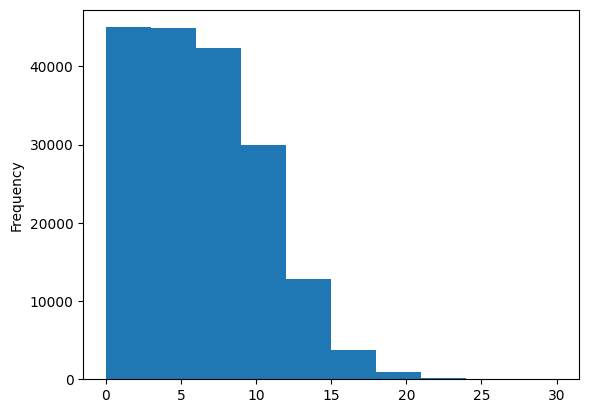

In [85]:
# Kiểm tra phân phối của cột "line_number"
train_df.line_number.plot.hist()

Quan sát phân phối của cột `"line_number"`, có vẻ như phần lớn các dòng có vị trí từ 15 trở xuống.

Như vậy, hãy đặt tham số `depth` của `tf.one_hot` thành 15.

In [86]:
# Sử dụng TensorFlow để tạo các tensor được mã hóa one-hot cho cột "line_number"
train_line_numbers_one_hot = tf.one_hot(train_df["line_number"].to_numpy(), depth=15)
val_line_numbers_one_hot = tf.one_hot(val_df["line_number"].to_numpy(), depth=15)
test_line_numbers_one_hot = tf.one_hot(test_df["line_number"].to_numpy(), depth=15)

Đặt tham số `depth` của `tf.one_hot` thành 15, có nghĩa là bất kỳ mẫu nào có giá trị `"line_number"` trên 15 sẽ được đặt thành tensor có giá trị 0, trong đó bất kỳ mẫu nào có `"line_number"` dưới 15 sẽ trở thành tensor có giá trị 0 nhưng với 1 ở chỉ mục bằng giá trị `"line_number"`.

> 🔑 **Lưu ý:** Chúng ta có thể tạo một one-hot tensor có chỗ cho tất cả các giá trị tiềm năng của `"line_number"` (`depth=30`); tuy nhiên, điều này sẽ khiến tensor tăng gấp đôi kích thước hiện tại (`depth=15`), trong đó phần lớn giá trị là 0. Ngoài ra, chỉ có ~2,000/180,000 mẫu có giá trị `"line_number"` trên 15. Do vậy, chúng ta sẽ không thu được nhiều thông tin về dữ liệu để tăng gấp đôi không gian đặc trưng. Kiểu bài toán này được gọi là **curse of dimensionality**. Tuy nhiên, vì chúng ta đang làm việc với các mô hình sâu, hãy cố gắng cung cấp càng nhiều thông tin cho mô hình càng tốt và xem điều gì sẽ xảy ra. Chúng ta sẽ khám phá các giá trị của tham số `depth` ở phần mở rộng.

In [87]:
# Kiểm  tra các mẫu đặc trưng "line_number" được mã hóa one-hot
train_line_numbers_one_hot.shape, train_line_numbers_one_hot[:20]

(TensorShape([180040, 15]),
 <tf.Tensor: shape=(20, 15), dtype=float32, numpy=
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0.

Chúng ta có thể thực hiện tương tự cho cột `"line_number"` với cột `"total_lines"`. Đầu tiên, hãy tìm một giá trị thích hợp cho tham số `depth` của `tf.one_hot`.

In [88]:
# Có bao nhiêu dòng khác nhau ở đây?
train_df["total_lines"].value_counts()

total_lines
11    24468
10    23639
12    22113
9     19400
13    18438
14    14610
8     12285
15    10768
7      7464
16     7429
17     5202
6      3353
18     3344
19     2480
20     1281
5      1146
21      770
22      759
23      264
4       215
24      200
25      182
26       81
28       58
3        32
30       31
27       28
Name: count, dtype: int64

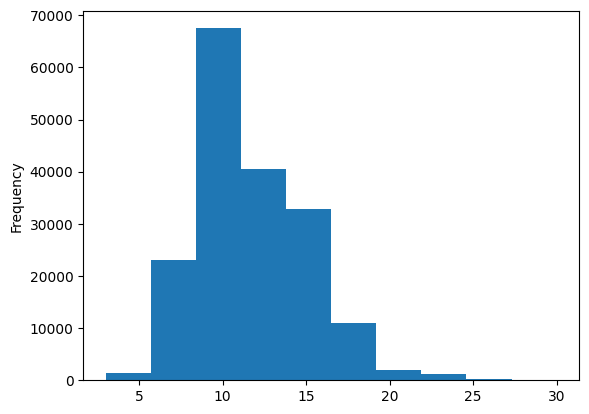

In [89]:
# Kiểm tra phân phối của total lines
train_df.total_lines.plot.hist();

Quan sát phân phối của cột `"total_lines"`, có vẻ giá trị 20 chiếm phần lớn các mẫu.

Chúng ta có thể xác nhận điều này với [`np.percentile()`](https://numpy.org/doc/stable/reference/generated/numpy.percentile.html).

In [90]:
 # Kiểm tra độ bao phủ của giá trị "total_lines" 20
np.percentile(train_df.total_lines, 98) # giá trị 20 chiếm 98% mẫu

20.0

Nó chiếm khá nhiều mẫu. Hãy mã hóa one-hot cột `"total_lines"` như chúng ta đã làm với cột `"line_number"`.

In [91]:
# Sử dụng TensorFlow để tạo các tensor được mã hóa one-hot cho cột "total_lines"
train_total_lines_one_hot = tf.one_hot(train_df["total_lines"].to_numpy(), depth=20)
val_total_lines_one_hot = tf.one_hot(val_df["total_lines"].to_numpy(), depth=20)
test_total_lines_one_hot = tf.one_hot(test_df["total_lines"].to_numpy(), depth=20)

# Kiểm tra shape và các mẫu của total lines one-hot tensor
train_total_lines_one_hot.shape, train_total_lines_one_hot[:10]

(TensorShape([180040, 20]),
 <tf.Tensor: shape=(10, 20), dtype=float32, numpy=
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0

### Xây dựng mô hình tribrid embedding

Tuyệt vời! Các Positional embedding tensor đã sẵn sàng.

ã đến lúc xây dựng mô hình lớn nhất mà chúng ta từng xây dựng, kết hợp token embedding, character embedding và positional embedding mới được tạo.

Chúng ta sẽ xây dựng một mô hình chưa từng khám phá nhưng chúng ta đều nắm được mọi thứ cần thiết.

Cụ thể, chúng ta sẽ thực hiện các bước sau:

1. Tạo mô hình ở cấp độ token (tương tự `model_1`)
2. Tạo mô hình ở cấp độ ký tự (tương tự `model_3` với một chút sửa đổi để so sánh với tài liệu)
3. Tạo mô hình `"line_number"`(lấy tensor `"line_number"` được mã hóa one-hot và truyền nó qua một layer phi tuyến tính)
4. Tạo mô hình `"total_lines"` (lấy tensor `"total_lines"` được mã hóa one-hot và truyền nó qua một layer phi tuyến tính)
5. Kết hợp (sử dụng [`layers.Concatenate`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Concatenate)) đầu ra của 1 và 2  thành một token-character-hybrid embedding và truyền chuỗi đầu ra của nó cho Hình 1 và phần  4.2 của [*Neural Networks for Joint Sentence Classification
in Medical Paper Abstracts*](https://arxiv.org/pdf/1612.05251.pdf)
6. Kết hợp (sử dụng [`layers.Concatenate`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Concatenate)) đầu ra của 3, 4 và 5 thành một token-character-positional tribrid embedding
7. Tạo một layer đầu ra để chấp nhận tribrid embedding và xuất ra các xác suất nhãn đã dự đoán
8. Kết hợp các đầu vào của 1, 2, 3, 4 và đầu ra của 7 thành [`tf.keras.Model`](https://www.tensorflow.org/api_docs/python/tf/keras/Model).

Rất nhiều thứ cần thực hiện ... không có gì mà chúng ta không thực hiện được. Hãy mã hóa nó.

In [92]:
# 1. Token inputs
token_inputs = layers.Input(shape=[], dtype="string", name="token_inputs")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_outputs = layers.Dense(128, activation="relu")(token_embeddings)
token_model = tf.keras.Model(inputs=token_inputs,
                             outputs=token_embeddings)

# 2. Char inputs
char_inputs = layers.Input(shape=(1,), dtype="string", name="char_inputs")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(32))(char_embeddings)
char_model = tf.keras.Model(inputs=char_inputs,
                            outputs=char_bi_lstm)

# 3. Line numbers inputs
line_number_inputs = layers.Input(shape=(15,), dtype=tf.int32, name="line_number_input")
x = layers.Dense(32, activation="relu")(line_number_inputs)
line_number_model = tf.keras.Model(inputs=line_number_inputs,
                                   outputs=x)

# 4. Total lines inputs
total_lines_inputs = layers.Input(shape=(20,), dtype=tf.int32, name="total_lines_input")
y = layers.Dense(32, activation="relu")(total_lines_inputs)
total_line_model = tf.keras.Model(inputs=total_lines_inputs,
                                  outputs=y)

# 5. Kết hợp token embeddings và char embeddings thành hybrid embedding
combined_embeddings = layers.Concatenate(name="token_char_hybrid_embedding")([token_model.output,
                                                                              char_model.output])
z = layers.Dense(256, activation="relu")(combined_embeddings)
z = layers.Dropout(0.5)(z)

# 6. Kết hợp positional embeddings với token và char embeddings đã kết hợp thành tribrid embedding
z = layers.Concatenate(name="token_char_positional_embedding")([line_number_model.output,
                                                                total_line_model.output,
                                                                z])

# 7. Tạo output layer
output_layer = layers.Dense(5, activation="softmax", name="output_layer")(z)

# 8. Kết hợp thành một mô hình
model_5 = tf.keras.Model(inputs=[line_number_model.input,
                                 total_line_model.input,
                                 token_model.input,
                                 char_model.input],
                         outputs=output_layer)

Có rất nhiều thứ đang diễn ra ở đây ... hãy hình dung những gì đang xảy ra với summary bằng cách vẽ sơ đồ mô hình.

In [ ]:
# Lấy summary của mô hình token, char và positional embedding
model_5.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
char_inputs (InputLayer)        [(None, 1)]          0                                            
__________________________________________________________________________________________________
char_vectorizer (TextVectorizat (None, 290)          0           char_inputs[0][0]                
__________________________________________________________________________________________________
token_inputs (InputLayer)       [(None,)]            0                                            
__________________________________________________________________________________________________
char_embed (Embedding)          (None, 290, 25)      1750        char_vectorizer[2][0]            
____________________________________________________________________________________________

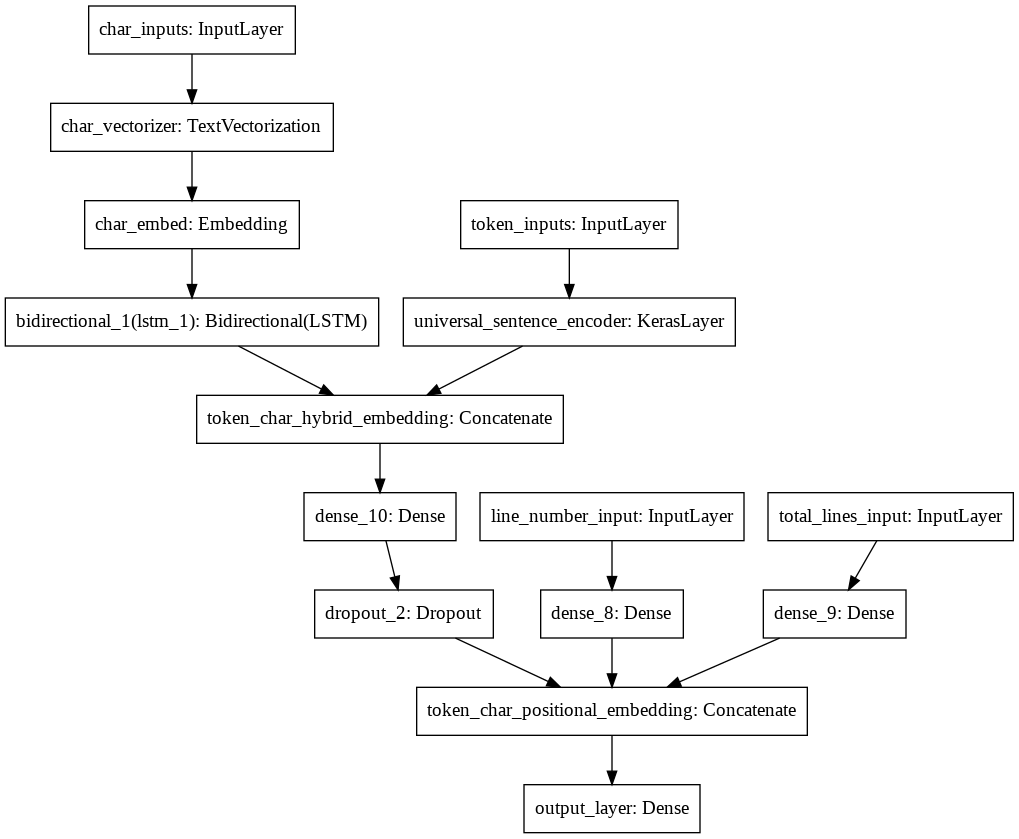

In [ ]:
# Vẽ mô hình token, char, positional embedding
from tensorflow.keras.utils import plot_model
plot_model(model_5)

Việc trực quan hóa mô hình sẽ giúp nó trông dễ hiểu hơn nhiều.

Nhìn chung, chúng ta đang cố gắng mã hóa nhiều thông tin về chuỗi nhất có thể thành các embedding khác nhau (đầu vào cho mô hình) để mô hình có cơ hội tìm ra nhãn nào thuộc về chuỗi (đầu ra của mô hình).

Bạn sẽ nhận thấy mô hình của chúng ta trông rất giống với mô hình được hiển thị trong Hình 1 của [*Neural Networks for Joint Sentence Classification
in Medical Paper Abstracts*](https://arxiv.org/pdf/1612.05251.pdf). Tuy nhiên, vẫn có một số điểm khác biệt:
* Chúng ta đang sử dụng pretrained TensorFlow Hub token embedding thay vì GloVe emebdding.
* Chúng ta đang sử dụng Dense layer trên đầu token-character hybrid embedding thay vì bi-LSTM layer.
* Phần 3.1.3 của tài liệu đề cập đến layer tối ưu label sequence (giúp đảm bảo các sequence label xuất hiện theo thứ tự phù hợp) nhưng nó không được hiển thị trong Hình 1. Để bù vào phần thiếu của layer này trong mô hình, chúng ta tạo các layer positional embedding.
* Phần 4.2 của tài liệu đề cập đến việc token embedding và character embedding được cập nhật trong quá trình huấn luyện, pretrained TensorFlow Hub embedding thì vẫn bị đóng băng.
* Tài liệu sử dụng [`SGD`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) optimizer, nhưng chúng ta sẽ sử dụng [`Adam`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam).

Tất cả những điểm khác biệt trên đều là những phần mở rộng tiềm năng của dự án này.

In [ ]:
# Kiểm tra những layer nào của mô hình có thể huấn luyện
for layer in model_5.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f1fa3d725d0> True
<keras.layers.preprocessing.text_vectorization.TextVectorization object at 0x7f1ecec2d0d0> True
<keras.engine.input_layer.InputLayer object at 0x7f1fa3d22210> True
<keras.layers.embeddings.Embedding object at 0x7f1ececbc8d0> True
<tensorflow_hub.keras_layer.KerasLayer object at 0x7f1fa586e5d0> False
<keras.layers.wrappers.Bidirectional object at 0x7f1fa3dff090> True
<keras.layers.merge.Concatenate object at 0x7f1fb14effd0> True
<keras.engine.input_layer.InputLayer object at 0x7f1fa3ec1890> True
<keras.engine.input_layer.InputLayer object at 0x7f1fa3ef9610> True
<keras.layers.core.Dense object at 0x7f1fb14efbd0> True
<keras.layers.core.Dense object at 0x7f1fa3d9b110> True
<keras.layers.core.Dense object at 0x7f1fb14e4f10> True
<keras.layers.core.Dropout object at 0x7f1fb14efed0> True
<keras.layers.merge.Concatenate object at 0x7f1fb14e49d0> True
<keras.layers.core.Dense object at 0x7f1fb14f3790> True


Mô hình đã được tạo, hãy biên dịch nó.

Lần này, chúng ta sẽ giới thiệu một tham số mới cho hàm mất mát là `label_smoothing`. `label_smoothing` giúp điều chỉnh mô hình (ngăn chặn overfitting) bằng cách đảm bảo nó không quá tập trung vào việc áp dụng một nhãn cụ thể cho một mẫu.

Ví dụ: thay vì có dự đoán đầu ra là:
* `[0.0, 0.0, 1.0, 0.0, 0.0]` cho một mẫu (mô hình rất tự tin rằng nhãn đúng là chỉ số 2).

Các dự đoán của nó sẽ trở nên mượt mà giống như:
* `[0.01, 0.01, 0.096, 0.01, 0.01]` tạo ra một kích hoạt nhỏ cho từng nhãn khác, có hy vọng cải thiện khả năng khái quát.

> 📖 **Tài liệu:** Để biết thêm về label smoothing, hãy xem bài đăng trên blog của PyImageSearch: [*Label smoothing with Keras, TensorFlow, and Deep Learning*](https://www.pyimagesearch.com/2019/12/30/label-smoothing-with-keras-tensorflow-and-deep-learning/).

In [ ]:
# Biên dịch mô hình token, char, positional embedding
model_5.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2), # thêm label smoothing (các mẫu thực sự tự tin sẽ làm mịn một chút)
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

### Tạo tribrid embedding datasets và khớp mô hình fit tribrid

Mô hình đã biên dịch!

Một lần nữa, để các thử nghiệm diễn ra nhanh chóng, hãy lấy 20,000 mẫu cho 3 epoch.

Lần này mô hình của chúng ta yêu cầu bốn đầu vào đặc trưng:
1. Train line numbers one-hot tensor (`train_line_numbers_one_hot`)
2. Train total lines one-hot tensor (`train_total_lines_one_hot`)
3. Token-level sequences tensor (`train_sentences`)
4. Char-level sequences tensor (`train_chars`)

Chúng ta có thể truyền chúng dưới dạng tuple vào phương thức `tf.data.Dataset.from_tensor_slices()` để tạo các `PrefetchedDataset` theo batch có shape thích hợp.

In [67]:
# Tạo training và validation datasets (tất cả 4 loại đầu vào)
train_pos_char_token_data = tf.data.Dataset.from_tensor_slices((train_line_numbers_one_hot, # số dòng
                                                                train_total_lines_one_hot, # tổng số dòng
                                                                train_sentences, # huấn luyện token
                                                                train_chars)) # huấn luyện char
train_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot) # huấn luyện nhãn
train_pos_char_token_dataset = tf.data.Dataset.zip((train_pos_char_token_data, train_pos_char_token_labels)) # kết hợp dữ liệu và nhãn
train_pos_char_token_dataset = train_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) # biến thành các batch và prefetch một cách hợp lý

# Validation dataset
val_pos_char_token_data = tf.data.Dataset.from_tensor_slices((val_line_numbers_one_hot,
                                                              val_total_lines_one_hot,
                                                              val_sentences,
                                                              val_chars))
val_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_pos_char_token_dataset = tf.data.Dataset.zip((val_pos_char_token_data, val_pos_char_token_labels))
val_pos_char_token_dataset = val_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) # biến thành các batch và prefetch một cách hợp lý

# Kiểm tra shape đầu vào
train_pos_char_token_dataset, val_pos_char_token_dataset

(<_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

In [ ]:
# Khớp mô hình token, char và positional embedding
history_model_5 = model_5.fit(train_pos_char_token_dataset,
                              steps_per_epoch=int(0.1 * len(train_pos_char_token_dataset)),
                              epochs=3,
                              validation_data=val_pos_char_token_dataset,
                              validation_steps=int(0.1 * len(val_pos_char_token_dataset)))

Epoch 1/3
562/562 [==============================] - 24s 36ms/step - loss: 1.1013 - accuracy: 0.7260 - val_loss: 0.9930 - val_accuracy: 0.8002
Epoch 2/3
562/562 [==============================] - 19s 34ms/step - loss: 0.9771 - accuracy: 0.8114 - val_loss: 0.9606 - val_accuracy: 0.8268
Epoch 3/3
562/562 [==============================] - 19s 34ms/step - loss: 0.9627 - accuracy: 0.8180 - val_loss: 0.9493 - val_accuracy: 0.8271


Mô hình Tribrid được huấn luyện! Hãy đưa ra một số dự đoán với nó và đánh giá chúng giống như chúng ta đã làm trước đây.

In [ ]:
# Đưa ra dự đoán với mô hình token-char-positional hybrid
model_5_pred_probs = model_5.predict(val_pos_char_token_dataset, verbose=1)
model_5_pred_probs

945/945 [==============================] - 20s 20ms/step


array([[0.51536554, 0.10340027, 0.01223736, 0.34324795, 0.02574881],
       [0.5037048 , 0.1263607 , 0.0476622 , 0.3120701 , 0.01020223],
       [0.31137902, 0.10944027, 0.11880615, 0.3917513 , 0.06862326],
       ...,
       [0.04232275, 0.09047632, 0.04658423, 0.02905692, 0.7915597 ],
       [0.03812133, 0.3116883 , 0.10215054, 0.02388792, 0.5241519 ],
       [0.18210074, 0.5038779 , 0.18253621, 0.03620264, 0.0952825 ]],
      dtype=float32)

In [ ]:
# Biến xác suất dự đoán thành lớp dự đoán
model_5_preds = tf.argmax(model_5_pred_probs, axis=1)
model_5_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 4, 1])>

In [ ]:
# Tính toán các kết quả của mô hình token-char-positional hybrid
model_5_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_5_preds)
model_5_results

{'accuracy': 82.6128690586522,
 'f1': 0.8250369638872138,
 'precision': 0.8244488224211757,
 'recall': 0.8261286905865219}

## So sánh các kết quả mô hình

Chúng ta đã đi được một chặng đường dài, từ mô hình cơ sở đến huấn luyện một mô hình chứa ba loại embedding khác nhau.

Bây giờ, hãy so sánh chất lượng của từng mô hình với nhau.

Chúng ta cũng có thể so sánh mô hình của chúng ta với tài liệu [*PubMed 200k RCT:
a Dataset for Sequential Sentence Classification in Medical Abstracts*](https://arxiv.org/pdf/1710.06071.pdf).

Vì tất cả các kết quả mô hình của chúng ta đều nằm trong dictionary, nên hãy kết hợp chúng thành một pandas DataFrame để trực quan hóa chúng.

In [ ]:
# Kết hợp các kết quả của mô hình thành một DataFrame
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "custom_token_embed_conv1d": model_1_results,
                                  "pretrained_token_embed": model_2_results,
                                  "custom_char_embed_conv1d": model_3_results,
                                  "hybrid_char_token_embed": model_4_results,
                                  "tribrid_pos_char_token_embed": model_5_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,72.183238,0.718647,0.721832,0.698925
custom_token_embed_conv1d,78.448961,0.781494,0.784490,0.782299
pretrained_token_embed,71.425261,0.714881,0.714253,0.711455
custom_char_embed_conv1d,65.877797,0.654501,0.658778,0.651686
hybrid_char_token_embed,73.623064,0.737075,0.736231,0.733561
tribrid_pos_char_token_embed,82.612869,0.824449,0.826129,0.825037


In [ ]:
# Giảm accuracy xuống cùng thang đo như các phép đo khác
all_model_results["accuracy"] = all_model_results["accuracy"]/100

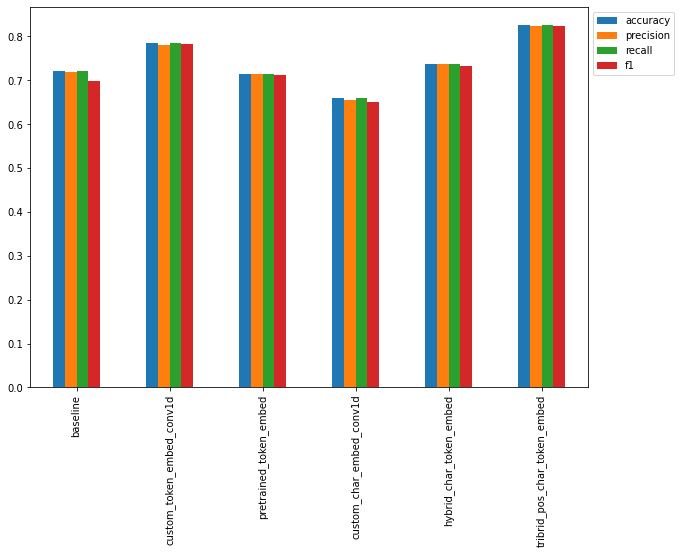

In [ ]:
# Vẽ và so sánh các kết quả của mô hình
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

Vì tài liệu [*PubMed 200k RCT:
a Dataset for Sequential Sentence Classification in Medical Abstracts*](https://arxiv.org/pdf/1710.06071.pdf) so sánh F1-score của mô hình được thử nghiệm trên tập dữ liệu kiểm tra, chúng ta hãy xem xét F1-score cho mô hình của chúng ta.

> 🔑 **Lưu ý:** Chúng ta cũng có thể thực hiện những so sánh này trong TensorBoard bằng cách sử dụng [`TensorBoard`](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/TensorBoard) callback trong quá trình huấn luyện.

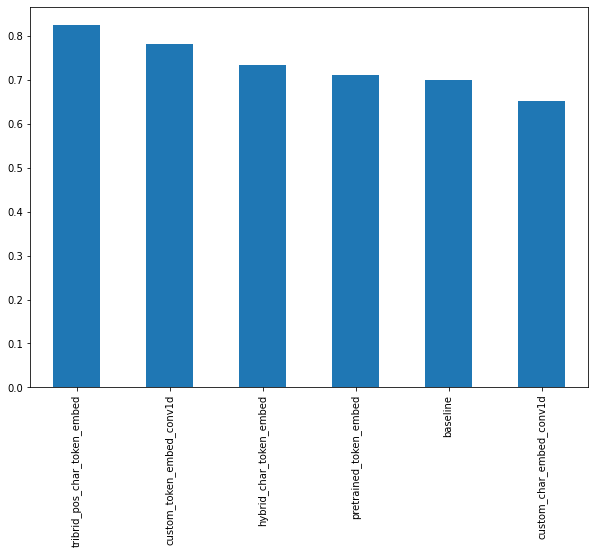

In [ ]:
# Sắp xếp kết quả mô hình theo f1-score
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));

Tuyệt! Dựa trên F1-score, có vẻ như mô hình tribrid embedding hoạt động tốt nhất với biên hợp lý.

Mặc dù vậy, so với kết quả được báo cáo trong Bảng 3 của tài liệu [*PubMed 200k RCT:
a Dataset for Sequential Sentence Classification in Medical Abstracts*](https://arxiv.org/pdf/1710.06071.pdf), F1-score của mô hình chúng ta vẫn hoạt động kém hơn (mô hình của tác giả đạt được F1-score là 90.0 trên Tập dữ liệu 20k RCT so với F1-score của chúng ta là ~82.6).

Cần lưu ý một số điều về sự khác biệt này:
* Các mô hình của chúng ta (ngoại trừ mô hình cơ sở) đã huấn luyện trên ~18,000 (10% số batch) mẫu gồm các chuỗi và nhãn thay vì đầy đủ ~180,000 mẫu trong tập dữ liệu 20k RCT.
  * Tuy nhiên, điều này thường xảy ra trong các thử nghiệm học máy, hãy đảm bảo huấn luyện trên ít mẫu hơn, sau đó nâng cấp lên khi cần thiết (phần mở rộng cho dự án này sẽ huấn luyện mô hình trên tập dữ liệu đầy đủ).
* Các mức độ chất lượng dự đoán của mô hình được đánh giá trên tập dữ liệu kiểm định chứ không phải tập dữ liệu kiểm tra (chúng ta sẽ sớm đánh giá mô hình tốt nhất trên tập dữ liệu kiểm tra).

## Lưu và load mô hình hoạt động tốt nhất

Do chúng ta đã thực hiện một số thử nghiệm hợp lý, nên hãy lưu mô hình hoạt động tốt nhất để chúng ta có thể sử dụng mà không cần huấn luyện lại.

Chúng ta có thể lưu mô hình hoạt động tốt nhất của mình bằng cách gọi phương thức [`save()`](https://www.tensorflow.org/guide/keras/save_and_serialize#the_short_answer_to_saving_loading).

In [ ]:
# Lưu mô hình hoạt động tốt nhất thành định dạng SavedModel (mặc định)
model_5.save("skimlit_tribrid_model") # mô hình sẽ được lưu vào đường dẫn do string chỉ định

INFO:tensorflow:Assets written to: skimlit_tribrid_model/assets


INFO:tensorflow:Assets written to: skimlit_tribrid_model/assets


Tùy chọn: Nếu đang sử dụng Google Colab, bạn có thể sao chép mô hình đã lưu của mình vào Google Drive (hoặc [download nó](https://colab.research.google.com/notebooks/io.ipynb#scrollTo=hauvGV4hV-Mh)) để có thêm bộ nhớ cố định (các file Google Colab sẽ biến mất sau khi ngắt kết nối).

In [ ]:
# Ví dụ về việc sao chép mô hình đã lưu từ Google Colab sang Drive (yêu cầu Google Drive)
# !cp skim_lit_best_model -r /content/drive/MyDrive/tensorflow_course/skim_lit


Giống như tất cả các chương trình nấu ăn, chúng ta có một mô hình đã huấn luyện trước (giống hệt kiểu mô hình mà chúng ta đã tạo cho `model_5` [được lưu trữ trên Google Storage](https://storage.googleapis.com/ztm_tf_course/skimlit/skimlit_best_model.zip)).

Vì vậy, để đảm bảo rằng chúng ta đều đang sử dụng cùng một mô hình để đánh giá, hãy download và load nó vào.

Khi load vào mô hình, vì nó sử dụng một vài [custom objects](https://www.tensorflow.org/guide/keras/save_and_serialize#custom_objects) ( TensorFlow Hub layer và layer `TextVectorization`), chúng ta cần load nó bằng cách chỉ định chúng trong tham số `custom_objects` của [`tf.keras.models.load_model()`](https://www.tensorflow.org/api_docs/python/tf/keras/models/load_model).



In [ ]:
# Download pretrained model từ Google Storage
!wget https://storage.googleapis.com/ztm_tf_course/skimlit/skimlit_tribrid_model.zip
!mkdir skimlit_gs_model
!unzip skimlit_tribrid_model.zip -d skimlit_gs_model

--2021-08-25 00:03:10--  https://storage.googleapis.com/ztm_tf_course/skimlit/skimlit_tribrid_model.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 142.251.2.128, 74.125.137.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 962561955 (918M) [application/zip]
Saving to: ‘skimlit_tribrid_model.zip’

skimlit_tribrid_mod 100%[===================>] 917.97M  40.9MB/s    in 12s     

2021-08-25 00:03:23 (74.5 MB/s) - ‘skimlit_tribrid_model.zip’ saved [962561955/962561955]

Archive:  skimlit_tribrid_model.zip
   creating: skimlit_gs_model/skimlit_tribrid_model/
   creating: skimlit_gs_model/skimlit_tribrid_model/variables/
  inflating: skimlit_gs_model/skimlit_tribrid_model/variables/variables.index  
  inflating: skimlit_gs_model/skimlit_tribrid_model/variables/variables.data-00000-of-00001  
  inflating: skimlit_gs_model/skimlit_tribrid_model/keras_

In [5]:
# Import TensorFlow model dependencies (nếu cần) - https://github.com/tensorflow/tensorflow/issues/38250
import tensorflow_hub as hub
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

model_path = "skimlit_gs_model/skimlit_tribrid_model"

# Load downloaded model from Google Storage
loaded_model = tf.keras.models.load_model(model_path)#,
                                          # Lưu ý: với TensorFlow từ bản 2.5 trở lên, nếu SavedModel có file keras_metadata.pb
                                          # (được tạo ra khi dùng model.save()), chúng ta không cần tham số custom_objects
                                          # Tôi để code bên dưới trong trường hợp bạn thực hiện.
                                          # custom_objects={"TextVectorization": TextVectorization, # cần thiết cho char vectorization
                                          #                 "KerasLayer": hub.KerasLayer}) # cần thiết cho token embedding

OSError: No file or directory found at skimlit_gs_model/skimlit_tribrid_model

### Đưa ra dự đoán và đánh giá với truth label

Để đảm bảo mô hình được lưu và load chính xác, hãy đưa ra dự đoán với mô hình đó, đánh giá chúng rồi so sánh chúng với kết quả dự đoán mà chúng ta đã tính trước đó.

In [ ]:
# Đưa ra dự đoán với mô hình đã load trên tập kiểm định
loaded_pred_probs = loaded_model.predict(val_pos_char_token_dataset, verbose=1)
loaded_preds = tf.argmax(loaded_pred_probs, axis=1)
loaded_preds[:10]

945/945 [==============================] - 132s 139ms/step


<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 3, 2, 2, 4, 4, 4, 4, 1])>

In [ ]:
# Đánh giá các dự đoán của mô hình đã load
loaded_model_results = calculate_results(val_labels_encoded,
                                         loaded_preds)
loaded_model_results

{'accuracy': 82.74526678141136,
 'f1': 0.8264355957043299,
 'precision': 0.8258640600563426,
 'recall': 0.8274526678141136}

Bây giờ, hãy so sánh các dự đoán của mô hình đã load với kết quả dự đoán mà chúng ta thu được trước khi lưu mô hình.

In [ ]:
# So sánh kết quả mô hình đã load với kết quả mô hình đã huấn luyện ban đầu (phải khá sát nhau)
np.isclose(list(model_5_results.values()), list(loaded_model_results.values()), rtol=1e-02)

array([ True,  True,  True,  True])

Cần lưu ý rằng việc load vào SavedModel sẽ bỏ đóng băng tất cả các layer (khiến cho tất cả chúng đều có thể huấn luyện được). Vì vậy, nếu bạn muốn đóng băng bất kỳ layer nào, cần đặt thuộc tính có thể huấn luyện thành `False`.

In [ ]:
# Kiểm tra loaded model summary (chú ý số lượng tham số có thể huấn luyện được)
loaded_model.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
char_inputs (InputLayer)        [(None, 1)]          0                                            
__________________________________________________________________________________________________
char_vectorizer (TextVectorizat (None, None)         0           char_inputs[0][0]                
__________________________________________________________________________________________________
token_inputs (InputLayer)       [(None,)]            0                                            
__________________________________________________________________________________________________
char_embed (Embedding)          (None, None, 25)     1750        char_vectorizer[0][0]            
____________________________________________________________________________________________

## Đánh giá mô hình trên tập kiểm tra

Để so sánh chất lượng của mô hình với kết quả được báo cáo trong Bảng 3 của tài liệu [*PubMed 200k RCT:
a Dataset for Sequential Sentence Classification in Medical Abstracts*](https://arxiv.org/pdf/1710.06071.pdf), hãy đưa ra dự đoán trên tập dữ liệu kiểm tra và đánh giá chúng.

In [ ]:
# Tạo test dataset batch và prefetched
test_pos_char_token_data = tf.data.Dataset.from_tensor_slices((test_line_numbers_one_hot,
                                                               test_total_lines_one_hot,
                                                               test_sentences,
                                                               test_chars))
test_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(test_labels_one_hot)
test_pos_char_token_dataset = tf.data.Dataset.zip((test_pos_char_token_data, test_pos_char_token_labels))
test_pos_char_token_dataset = test_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

# Kiểm tra shapes
test_pos_char_token_dataset

<PrefetchDataset shapes: (((None, 15), (None, 20), (None,), (None,)), (None, 5)), types: ((tf.float32, tf.float32, tf.string, tf.string), tf.float64)>

In [ ]:
# Đưa ra dự đoán trên tập dữ liệu kiểm tra
test_pred_probs = loaded_model.predict(test_pos_char_token_dataset,
                                       verbose=1)
test_preds = tf.argmax(test_pred_probs, axis=1)
test_preds[:10]

942/942 [==============================] - 132s 140ms/step


<tf.Tensor: shape=(10,), dtype=int64, numpy=array([3, 3, 2, 2, 4, 4, 4, 1, 4, 0])>

In [ ]:
# Kiểm tra các dự đoán của loaded model test
loaded_model_test_results = calculate_results(y_true=test_labels_encoded,
                                              y_pred=test_preds)
loaded_model_test_results

{'accuracy': 82.39588518334163,
 'f1': 0.8229369808171064,
 'precision': 0.8225726116113812,
 'recall': 0.8239588518334163}

Có vẻ như mô hình tốt nhất của chúng ta (cho đến nay) vẫn còn một số cách để sánh với chất lượng của kết quả trong tài liệu (mô hình của họ đạt F1-score 90.0 trên tập dữ liệu kiểm tra, trong khi của chúng ta đạt ~82.1 F1-score).

Tuy nhiên, như chúng ta đã thảo luận trước đây, mô hình chỉ được huấn luyện trên 20,000 trong tổng số ~ 180,000 chuỗi trong tập dữ liệu RCT 20k. Chúng ta cũng chưa tinh chỉnh pretrained embedding (tài liệu tinh chỉnh GloVe embedding). Vì vậy, chúng ta có thể thử một số tiện ích mở rộng để cải thiện kết quả của mình.

## Tìm các dự đoán sai nhất

Một trong những cách tốt nhất để điều tra xem mô hình đang sai ở đâu (cũng có khả năng là dữ liệu bị sai) là trực quan hóa các dự đoán "sai nhất".

Những dự đoán sai nhiều nhất là những mẫu mà mô hình đưa ra dự đoán với xác suất cao nhưng lại sai (dự đoán của mô hình không phù hợp với nhãn gốc).

Việc xem xét các dự đoán sai nhất cung cấp cho chúng ta thông tin giá trị về cách cải thiện các mô hình khác hoặc sửa các nhãn trong dữ liệu của chúng ta.

Hãy viết code để hình dung các dự đoán sai nhất từ ​​tập dữ liệu kiểm tra.

Đầu tiên, chúng ta sẽ chuyển đổi tất cả các dự đoán kiểm tra dựa trên số nguyên thành tên lớp dựa trên string.

In [ ]:
%%time
# Lấy danh sách tên lớp của các dự đoán kiểm tra
test_pred_classes = [label_encoder.classes_[pred] for pred in test_preds]
test_pred_classes

CPU times: user 10.2 s, sys: 856 ms, total: 11.1 s
Wall time: 9.42 s


Bây giờ, hãy làm phong phú test DataFame với một vài giá trị:
* Cột `"prediction"` (string) chứa dự đoán của mô hình cho một mẫu nhất định.
* Cột `"pred_prob"` (float) chứa xác suất dự đoán tối đa của mô hình cho một mẫu nhất định.
* Cột `"correct"` (bool) để cho biết liệu dự đoán của mô hình có khớp với nhãn mục tiêu của mẫu hay không.

In [ ]:
# Tạo test dataframe đã làm phong phú dự đoán
test_df["prediction"] = test_pred_classes # tạo cột với tên test prediction class
test_df["pred_prob"] = tf.reduce_max(test_pred_probs, axis=1).numpy() # lấy xác suất dự đoán tối đa
test_df["correct"] = test_df["prediction"] == test_df["target"] # tạo cột nhị phân để biết dự đoán có đúng hay không
test_df.head(20)

,target,text,line_number,total_lines,prediction,pred_prob,correct
0,BACKGROUND,this study analyzed liver function abnormaliti...,0,8,OBJECTIVE,0.513077,False
1,RESULTS,a post hoc analysis was conducted with the use...,1,8,OBJECTIVE,0.310540,False
2,RESULTS,liver function tests ( lfts ) were measured at...,2,8,METHODS,0.801705,False
3,RESULTS,survival analyses were used to assess the asso...,3,8,METHODS,0.627319,False
4,RESULTS,the percentage of patients with abnormal lfts ...,4,8,RESULTS,0.718288,True
5,RESULTS,when mean hemodynamic profiles were compared i...,5,8,RESULTS,0.879730,True
6,RESULTS,multivariable analyses revealed that patients ...,6,8,RESULTS,0.548948,True
7,CONCLUSIONS,abnormal lfts are common in the adhf populatio...,7,8,CONCLUSIONS,0.445276,True
8,CONCLUSIONS,elevated meld-xi scores are associated with po...,8,8,RESULTS,0.529703,False
9,BACKGROUND,minimally invasive endovascular aneurysm repai...,0,12,BACKGROUND,0.545452,True


Trông được đấy! Có dữ liệu như vậy giúp chúng ta dễ dàng thao tác và xem theo nhiều cách khác nhau.

Chúng ta có nên sắp xếp DataFrame của mình để tìm các mẫu có `"pred_prob"` cao nhất và vị trí dự đoán sai (`"correct" == False`) không?

In [ ]:
# Tìm 100 mẫu sai nhiều nhất (lưu ý: 100 là số tùy ý, bạn có thể xem qua tất cả nếu muốn)
top_100_wrong = test_df[test_df["correct"] == False].sort_values("pred_prob", ascending=False)[:100]
top_100_wrong

,target,text,line_number,total_lines,prediction,pred_prob,correct
16347,BACKGROUND,to evaluate the effects of the lactic acid bac...,0,12,OBJECTIVE,0.944838,False
13874,CONCLUSIONS,symptom outcomes will be assessed and estimate...,4,6,METHODS,0.941099,False
1221,RESULTS,data were collected prospectively for @ months...,3,13,METHODS,0.928523,False
13598,METHODS,-@ % vs. fish : -@ % vs. fish + s : -@ % ; p <...,6,9,RESULTS,0.918107,False
21382,OBJECTIVE,"design , settings , participants , and interve...",3,13,METHODS,0.918088,False
...,...,...,...,...,...,...,...
12269,RESULTS,patients received oral se tablets ( @ mcg ) or...,4,10,METHODS,0.821220,False
9881,RESULTS,"the primary outcome was bp control , and secon...",4,11,METHODS,0.821166,False
1220,RESULTS,the group intervention consisted of @ weekly c...,2,13,METHODS,0.821033,False
22105,RESULTS,we randomised @ statin treated cvd patients an...,3,12,METHODS,0.820954,False


Tuyệt (hoặc không quá tuyệt vời)! Bây giờ chúng ta đã có một tập hợp con các dự đoán sai nhất của mô hình, hãy viết một ít code để trực quan hóa chúng.

In [ ]:
# Kiểm tra các dự đoán sai nhất
for row in top_100_wrong[0:10].itertuples(): # điều chỉnh chỉ mục để xem các mẫu khác nhau
  _, target, text, line_number, total_lines, prediction, pred_prob, _ = row
  print(f"Target: {target}, Pred: {prediction}, Prob: {pred_prob}, Line number: {line_number}, Total lines: {total_lines}\n")
  print(f"Text:\n{text}\n")
  print("-----\n")

Target: BACKGROUND, Pred: OBJECTIVE, Prob: 0.9448384046554565, Line number: 0, Total lines: 12

Text:
to evaluate the effects of the lactic acid bacterium lactobacillus salivarius on caries risk factors .

-----

Target: CONCLUSIONS, Pred: METHODS, Prob: 0.9410986304283142, Line number: 4, Total lines: 6

Text:
symptom outcomes will be assessed and estimates of cost-effectiveness made .

-----

Target: RESULTS, Pred: METHODS, Prob: 0.9285234808921814, Line number: 3, Total lines: 13

Text:
data were collected prospectively for @ months beginning after completion of the first @ group clinic appointments ( @ months post randomization ) .

-----

Target: METHODS, Pred: RESULTS, Prob: 0.9181066155433655, Line number: 6, Total lines: 9

Text:
-@ % vs. fish : -@ % vs. fish + s : -@ % ; p < @ ) but there were no significant differences between groups .

-----

Target: OBJECTIVE, Pred: METHODS, Prob: 0.9180881381034851, Line number: 3, Total lines: 13

Text:
design , settings , participants , 

Bạn nhận thấy điều gì về những dự đoán sai nhất? Mô hình có mắc các sai lầm ngớ ngẩn không? Hay một số nhãn không chính xác/mơ hồ (ví dụ: một dòng trong abstract có thể bị gắn nhãn `OBJECTIVE` hoặc `BACKGROUND` và điều này hợp lý).

Bước tiếp theo, nếu có một vài mẫu có nhãn không nhất quán, chúng ta có thể xem qua tập dữ liệu huấn luyện, cập nhật nhãn và sau đó huấn luyện lại mô hình. Quá trình sử dụng mô hình để cải thiện/kiểm tra nhãn của tập dữ liệu thường gọi là **active learning (học chủ động)**.

## Đưa ra các dự đoán mẫu

Chúng ta đã đưa ra một số dự đoán trên tập dữ liệu kiểm tra, hãy thực sự kiểm tra mô hình.

Để thực hiện như vậy, chúng ta sẽ lấy một ít dữ liệu từ tự nhiên và xem mô hình hoạt động như thế nào.

Nói cách khác, chúng ta sẽ tìm một RCT abstract từ PubMed, tiền xử lý text để nó hoạt động trong mô hình, sau đó truyền từng chuỗi trong abstract qua mô hình để xem nó dự đoán nhãn nào.

Để có một mẫu thích hợp, chúng ta sẽ cần tìm PubMed cho RCT (Thử nghiệm đối chứng ngẫu nhiên) mà không có abstract đã phân tách (khi khám phá PubMed, bạn sẽ nhận thấy nhiều abstract đã được định dạng trước thành các phần riêng biệt, giúp dễ đọc hơn).

Trải qua các nghiên cứu PubMed khác nhau, tôi thấy abstract không có cấu trúc sau đây từ [*RCT of a manualized social treatment for high-functioning autism spectrum disorders*](https://pubmed.ncbi.nlm.nih.gov/20232240/):

> This RCT examined the efficacy of a manualized social intervention for children with HFASDs. Participants were randomly assigned to treatment or wait-list conditions. Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language. A response-cost program was applied to reduce problem behaviors and foster skills acquisition. Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures). Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents. High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity. Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group.

Nhìn thấy một đoạn văn bản lớn có vẻ khá đáng sợ. Giả sử bạn là một nhà nghiên cứu y khoa, đang cố gắng đọc lướt qua các tài liệu để tìm một nghiên cứu có liên quan đến công việc của bạn.

Nghe có vẻ khá thách thức phải không?

Hãy nhập SkimLit 🤓🔥!

Hãy xem mô hình tốt nhất của chúng ta cho đến nay (`model_5`) tạo ra abstract gì ở trên.

Nhưng đợi đã ...

Như bạn có thể đã đoán, abstract ở trên không được định dạng theo cấu trúc giống như dữ liệu mà mô hình của chúng ta đã huấn luyện. Do đó, trước khi đưa ra dự đoán về nó, chúng ta cần tiền xử lý nó như các trình tự khác.

Cụ thể hơn, đối với mỗi abstract, chúng ta sẽ cần:

1. Chia nó thành các câu (dòng).
2. Chia nó thành các ký tự.
3. Tìm số của mỗi dòng.
4. Tìm tổng số dòng.

Bắt đầu với số 1, có một số cách để chia abstract thành các câu thực tế. Một cách đơn giản là sử dụng phương thức `split()` string được tích hợp sẵn của Python, tách abstract ở bất cứ đâu xuất hiện fullstop. Tuy nhiên, bạn có nghĩ điều này có thể sai ở đâu không?

Một tùy chọn khác nâng cao hơn là tận dụng lớp [`sentencizer`](https://spacy.io/usage/linguistic-features#sbd)[của spaCy](https://spacy.io/) (một thư viện NLP rất mạnh). Đây là một bộ tách câu dễ sử dụng dựa trên mô hình ngôn ngữ tiếng Anh của spaCy.

Tôi đã chuẩn bị một số abstract từ các tài liệu PubMed RCT để thử mô hình của chúng ta, có thể download chúng từ [GitHub](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/skimlit_example_abstracts.json).


In [73]:
# Download và mở các abstract mẫu (copy và paste từ PubMed)
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/skimlit_example_abstracts.json

with open("skimlit_example_abstracts.json", "r") as f:
  example_abstracts = json.load(f)

example_abstracts

In [ ]:
# Hãy xem các abstract mẫu trông như thế nào
abstracts = pd.DataFrame(example_abstracts)
abstracts

Chúng ta đã download một số abstract mẫu, hãy xem một trong số chúng hoạt động như thế nào với mô hình đã huấn luyện của chúng ta.

Đầu tiên, chúng ta sẽ cần phân tích cú pháp nó bằng cách sử dụng spaCy để biến nó từ một đoạn văn bản lớn thành các câu.

In [ ]:
# Tạo sentencizer - Nguồn: https://spacy.io/usage/linguistic-features#sbd
from spacy.lang.en import English
nlp = English() # thiết lập English sentence parser
sentencizer = nlp.create_pipe("sentencizer") # tạo đối tượng sentence splitting pipeline
nlp.add_pipe(sentencizer) # thêm đối tượng sentence splitting pipeline vào sentence parser
doc = nlp(example_abstracts[0]["abstract"]) # tạo "doc" của các câu đã phân tích, đổi chỉ mục cho một abstract khác
abstract_lines = [str(sent) for sent in list(doc.sents)] # trả về các câu đã tìm thấy từ doc ở dạng string (không phải dạng spaCy token)
abstract_lines

Tuyệt! Có vẻ như spaCy đã tách các câu trong abstract một cách chính xác. Tuy nhiên, cần lưu ý rằng có thể có nhiều abstract phức tạp hơn không được phân tách hoàn hảo thành các câu riêng biệt (chẳng hạn như ví dụ trong [*Baclofen promotes alcohol abstinence in alcohol dependent cirrhotic patients with hepatitis C virus (HCV) infection*](https://pubmed.ncbi.nlm.nih.gov/22244707/)), ở này trường hợp, có nhiều kỹ thuật phân tách tùy chỉnh hơn sẽ được nghiên cứu.

Bây giờ, abstract của chúng ta đã được chia thành các câu, hãy viết một số đoạn code để đếm số dòng cũng như tổng số dòng.

Để làm như vậy, chúng ta có thể tận dụng một số chức năng của hàm `preprocess_text_with_line_numbers()`.

In [ ]:
# Lấy tổng số dòng
total_lines_in_sample = len(abstract_lines)

# Xem qua từng dòng trong abstract và tạo một danh sách các dictionary chứa các đặc trưng cho mỗi dòng
sample_lines = []
for i, line in enumerate(abstract_lines):
  sample_dict = {}
  sample_dict["text"] = str(line)
  sample_dict["line_number"] = i
  sample_dict["total_lines"] = total_lines_in_sample - 1
  sample_lines.append(sample_dict)
sample_lines

Bây giờ chúng ta đã có các giá trị `"line_number"` và `"total_lines"`, chúng ta có thể mã hóa one-hot chúng với `tf.one_hot` giống như chúng ta đã thực hiện với tập dữ liệu huấn luyện (sử dụng các giá trị tương tự cho tham số `depth`).

In [ ]:
# Lấy tất cả các giá trị line_number từ abstract mẫu
test_abstract_line_numbers = [line["line_number"] for line in sample_lines]
# Mã hóa one-hot cho depth tương tư như dữ liệu huấn luyện, để mô hình chấp nhận đúng shape đầu vào
test_abstract_line_numbers_one_hot = tf.one_hot(test_abstract_line_numbers, depth=15)
test_abstract_line_numbers_one_hot

In [ ]:
# Lấy tất cả các giá trị total_lines từ abstract mẫu
test_abstract_total_lines = [line["total_lines"] for line in sample_lines]
# Mã hóa one-hot cho depth tương tư như dữ liệu huấn luyện, để mô hình chấp nhận đúng shape đầu vào
test_abstract_total_lines_one_hot = tf.one_hot(test_abstract_total_lines, depth=20)
test_abstract_total_lines_one_hot

Chúng ta cũng có thể sử dụng hàm `split_chars()` để phân tách các dòng abstract thành các ký tự.

In [ ]:
# Tách các dòng abstract thành các ký tự
abstract_chars = [split_chars(sentence) for sentence in abstract_lines]
abstract_chars

Chúng ta đã tiền xử lý wild RCT abstract thành tất cả các đặc trưng tương tự mà mô hình đã huấn luyện, hãy chuyển các đặc trưng này vào mô hình của mình và đưa ra các dự đoán nhãn chuỗi!

In [ ]:
# Đưa ra dự đoán về các đặc trưng của abstract mẫu
%%time
test_abstract_pred_probs = loaded_model.predict(x=(test_abstract_line_numbers_one_hot,
                                                   test_abstract_total_lines_one_hot,
                                                   tf.constant(abstract_lines),
                                                   tf.constant(abstract_chars)))
test_abstract_pred_probs

In [ ]:
# Biến xác suất dự đoán thành lớp dự đoán
test_abstract_preds = tf.argmax(test_abstract_pred_probs, axis=1)
test_abstract_preds

Chúng ta đã có nhãn chuỗi được dự đoán cho mỗi dòng trong abstract mẫu, hãy viết một ít code để hình dung từng câu với nhãn dự đoán của nó.

In [ ]:
# Biến các số nguyên lớp dự đoán thành chuỗi tên lớp
test_abstract_pred_classes = [label_encoder.classes_[i] for i in test_abstract_preds]
test_abstract_pred_classes

In [ ]:
# Trực quan hóa các dòng abstract và nhãn chuỗi đã dự đoán
for i, line in enumerate(abstract_lines):
  print(f"{test_abstract_pred_classes[i]}: {line}")

Như vậy không dễ đọc hơn nhiều sao? Ý tôi là, có vẻ như các dự đoán của mô hình có thể cải thiện, điều đó thật tuyệt đúng không?

Hãy tưởng tượng việc triển khai mô hình cho backend của trang web PubMed để định dạng bất RCT abstract không có cấu trúc nào trên trang web.

Hay có một tiện ích mở rộng trình duyệt là "SkimLit" sẽ thêm cấu trúc (được hỗ trợ bởi mô hình của chúng ta) vào bất kỳ RCT abtract không có cấu trúc nào.

Và nếu đưa điều này cho một người bạn là nhà nghiên cứu y khoa của bạn xem, họ cho rằng các dự đoán không đạt tiêu chuẩn, thì có thể có một nút thông báo "nhãn này có chính xác không? ... nếu không, thì nó là gì?". Theo cách đó, tập dữ liệu cùng với các dự đoán trong tương lai của mô hình có thể cải thiện theo thời gian.

Tất nhiên, có nhiều cách khác để cải thiện mô hình, khả năng sử dụng, chức năng tiền xử lý (ví dụ: hàm hóa pipeline tiền xử lý abstract mẫu) nhưng tôi sẽ để lại những phần này cho các bài tập/phần mở rộng.

> 🤔 **Câu hỏi:** Làm thế nào để chắc chắn rằng kết quả của mẫu thử nghiệm từ tự nhiên thực sự là *wild*? Chúng ta có nên kiểm tra về mẫu chúng ta đang thử nghiệm không?

## 🛠 Bài tập thực hành
> **Lưu ý:** Các bạn cần làm phần bài tập này để chuẩn bị cho phiên review lab.

1. Huấn luyện `model_5` trên tất cả dữ liệu trong tập dữ liệu huấn luyện trong nhiều epoch cho đến khi nó ngừng cải thiện. Vì quá trình này có thể tốn một chút thời gian, bạn có thể sử dụng:
  * [`tf.keras.callbacks.ModelCheckpoint`](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint) để chỉ lưu trọng số tốt nhất của mô hình.
  * [`tf.keras.callbacks.EarlyStopping`](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) để dừng huấn luyện mô hình sau khi validation loss đã ngừng cải thiện trong ~3 epoch.



2. Xem [hướng dẫn của Keras về cách sử dụng pretrained GloVe embedding](https://keras.io/examples/nlp/pretrained_word_embeddings/). Bạn có thể làm cho điều này hoạt động với một trong các mô hình của chúng ta không?
  * Gợi ý: Bạn sẽ muốn kết hợp nó với một layer token [Embedding](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding) tùy chỉnh.
  * Bạn có thể tinh chỉnh các GloVe embedding hoặc đóng băng chúng.


3. Điều gì xảy ra nếu chúng ta hợp nhất các đặc trưng `line_number` và `total_lines` cho từng chuỗi? Ví dụ: tạo đặc trưng `X_of_Y` thay thế? Điều này có ảnh hưởng tới chất lượng mô hình không?
  * Một ví dụ khác: `line_number=1` và `total_lines=11` biến thành `line_of_X=1_of_11`.

4. Viết một hàm (hoặc một chuỗi các hàm) để lấy một string abstract mẫu, tiền xử lý nó (theo cách tương tự mà mô hình đã huấn luyện), đưa ra dự đoán trên mỗi chuỗi trong abstract và trả về abstract ở định dạng:
  * `PREDICTED_LABEL`: `SEQUENCE`
  * `PREDICTED_LABEL`: `SEQUENCE`
  * `PREDICTED_LABEL`: `SEQUENCE`
  * `PREDICTED_LABEL`: `SEQUENCE`
  * ...
    * Bạn có thể tìm RCT abstract không có cấu trúc của riêng mình từ PubMed hoặc thử phần này từ: [*Baclofen promotes alcohol abstinence in alcohol dependent cirrhotic patients with hepatitis C virus (HCV) infection*](https://pubmed.ncbi.nlm.nih.gov/22244707/).

In [77]:
# 1. Huấn luyện model_5 trên tất cả dữ liệu trong tập dữ liệu huấn luyện trong nhiều epoch cho đến khi nó ngừng cải thiện.
# Vì quá trình này có thể tốn một chút thời gian, bạn có thể sử dụng:
# 1. Token inputs
token_inputs = layers.Input(shape=[], dtype="string", name="token_inputs")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_outputs = layers.Dense(128, activation="relu")(token_embeddings)
token_model = tf.keras.Model(inputs=token_inputs,
                             outputs=token_embeddings)

# 2. Char inputs
char_inputs = layers.Input(shape=(1,), dtype="string", name="char_inputs")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(32))(char_embeddings)
char_model = tf.keras.Model(inputs=char_inputs,
                            outputs=char_bi_lstm)

# 3. Line numbers inputs
line_number_inputs = layers.Input(shape=(15,), dtype=tf.int32, name="line_number_input")
x = layers.Dense(32, activation="relu")(line_number_inputs)
line_number_model = tf.keras.Model(inputs=line_number_inputs,
                                   outputs=x)

# 4. Total lines inputs
total_lines_inputs = layers.Input(shape=(20,), dtype=tf.int32, name="total_lines_input")
y = layers.Dense(32, activation="relu")(total_lines_inputs)
total_line_model = tf.keras.Model(inputs=total_lines_inputs,
                                  outputs=y)

# 5. Kết hợp token embeddings và char embeddings thành hybrid embedding
combined_embeddings = layers.Concatenate(name="token_char_hybrid_embedding")([token_model.output,
                                                                              char_model.output])
z = layers.Dense(256, activation="relu")(combined_embeddings)
z = layers.Dropout(0.5)(z)

# 6. Kết hợp positional embeddings với token và char embeddings đã kết hợp thành tribrid embedding
z = layers.Concatenate(name="token_char_positional_embedding")([line_number_model.output,
                                                                total_line_model.output,
                                                                z])

# 7. Tạo output layer
output_layer = layers.Dense(5, activation="softmax", name="output_layer")(z)

# 8. Kết hợp thành một mô hình
model_5 = tf.keras.Model(inputs=[line_number_model.input,
                                 total_line_model.input,
                                 token_model.input,
                                 char_model.input],
                         outputs=output_layer)


model_5.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2), # thêm label smoothing (các mẫu thực sự tự tin sẽ làm mịn một chút)
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_model_5 = model_5.fit(train_pos_char_token_dataset,
                              steps_per_epoch=int(len(train_pos_char_token_dataset)),
                              epochs=5,
                              validation_data=val_pos_char_token_dataset,
                              validation_steps=int(len(val_pos_char_token_dataset)),
                              callbacks = [tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=3)])

Epoch 1/5
5627/5627 [==============================] - 192s 33ms/step - loss: 0.9642 - accuracy: 0.8183 - val_loss: 0.9183 - val_accuracy: 0.8472
Epoch 2/5
5627/5627 [==============================] - 181s 32ms/step - loss: 0.9264 - accuracy: 0.8469 - val_loss: 0.9086 - val_accuracy: 0.8528
Epoch 3/5
5627/5627 [==============================] - 180s 32ms/step - loss: 0.9180 - accuracy: 0.8536 - val_loss: 0.9041 - val_accuracy: 0.8568
Epoch 4/5
5627/5627 [==============================] - 184s 33ms/step - loss: 0.9122 - accuracy: 0.8585 - val_loss: 0.9001 - val_accuracy: 0.8593
Epoch 5/5
5627/5627 [==============================] - 182s 32ms/step - loss: 0.9072 - accuracy: 0.8619 - val_loss: 0.8951 - val_accuracy: 0.8632


In [101]:

#2 sử dụng pretrained GloVe embedding.
import os

# Only the TensorFlow backend supports string inputs.

import pathlib
import numpy as np
import tensorflow.data as tf_data
import keras
from keras import layers
data_path = keras.utils.get_file(
    "news20.tar.gz",
    "http://www.cs.cmu.edu/afs/cs.cmu.edu/project/theo-20/www/data/news20.tar.gz",
    untar=True,
)
data_dir = pathlib.Path(data_path).parent / "20_newsgroup"
dirnames = os.listdir(data_dir)

samples = []
labels = []
class_names = []
class_index = 0
for dirname in sorted(os.listdir(data_dir)):
    class_names.append(dirname)
    dirpath = data_dir / dirname
    fnames = os.listdir(dirpath)
    for fname in fnames:
        fpath = dirpath / fname
        f = open(fpath, encoding="latin-1")
        content = f.read()
        lines = content.split("\n")
        lines = lines[10:]
        content = "\n".join(lines)
        samples.append(content)
        labels.append(class_index)
    class_index += 1


vectorizer = layers.TextVectorization(max_tokens=20000, output_sequence_length=15)
text_ds = tf_data.Dataset.from_tensor_slices(samples)
vectorizer.adapt(text_ds)

# Tạo mô hình Conv1D để xử lý các chuỗi
inputs = layers.Input(shape=(1,), dtype=tf.string)
text_vectors = vectorizer(inputs) # vectơ hóa đầu vào text
token_embeddings = token_embed(text_vectors) # tạo embedding
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(token_embeddings)
x = layers.GlobalAveragePooling1D()(x) # cô đọng đầu ra của vectơ đặc trưng
outputs = layers.Dense(num_classes, activation="softmax")(x)
model_1 = tf.keras.Model(inputs, outputs)

# Compile
model_1.compile(loss="categorical_crossentropy", # nếu nhãn ở dạng số nguyên (không phải one hot), hãy sử dụng sparse_categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_1_history = model_1.fit(train_dataset,
                              steps_per_epoch=int(0.1 * len(train_dataset)), # chỉ khớp trên 10% của batch để thời gian huấn luyện nhanh hơn
                              epochs=3,
                              validation_data=valid_dataset,
                              validation_steps=int(0.1 * len(valid_dataset))) # chỉ kiểm định trên 10% của batch

Epoch 1/3
562/562 [==============================] - 14s 23ms/step - loss: 0.9165 - accuracy: 0.6408 - val_loss: 0.7034 - val_accuracy: 0.7267
Epoch 2/3
562/562 [==============================] - 5s 8ms/step - loss: 0.6953 - accuracy: 0.7369 - val_loss: 0.6627 - val_accuracy: 0.7440
Epoch 3/3
562/562 [==============================] - 4s 7ms/step - loss: 0.6613 - accuracy: 0.7543 - val_loss: 0.6406 - val_accuracy: 0.7547


In [23]:
output = vectorizer(["this study demonstrated that the combination of emla cream with propofol is beneficial"])
output.numpy()[0,:5]

array([  14,  763, 3865,   10,    2])

##3. Điều gì xảy ra nếu chúng ta hợp nhất các đặc trưng line_number và total_lines cho từng chuỗi? Ví dụ: tạo đặc trưng X_of_Y thay thế? Điều này có ảnh hưởng tới chất lượng mô hình không?

Nếu xử lý tiền dữ liệu tốt thì chúng ta vẫn thu lại được kết quả như các mô hình trên, nhưng như thế sẽ tạo ra nhiều đặc trưng hơn, cụ thể là mảng one-hot sẽ lớn hơn , có kích thước là MxN.

In [76]:
# 4.Viết một hàm (hoặc một chuỗi các hàm) để lấy một string abstract mẫu, tiền xử lý nó (theo cách tương tự mà mô hình đã huấn luyện), đưa ra dự đoán trên mỗi chuỗi trong abstract và trả về abstract ở định dạng:
def predict_(text,model = model_2):
  # Chuyển đổi dự đoán với mô hình feature extraction thành các lớp
  model_2_pred_probs = model.predict(x = [text])
  model_2_preds = tf.argmax(model_2_pred_probs, axis=1)
  print(f'PREDICTED_LABEL: {class_names[model_2_preds]}')
predict_('low-dose oral prednisolone had both a short-term and a longer sustained effect resulting in less knee pain , better physical function , and attenuation of systemic inflammation in older patients with knee oa ( clinicaltrials.gov identifier nct@ ) .')


1/1 [==============================] - 0s 96ms/step
PREDICTED_LABEL: ['CONCLUSIONS']


## 📖 Tài liệu đọc thêm
* Để biết thêm về cách làm việc với text/spaCy, hãy xem [khóa học NLP nâng cao của spaCy](https://course.spacy.io/en/). Nếu đang giải quyết các bài toán NLP ở cấp độ sản xuất, chúng ta có thể sử dụng spaCy.
* Để biết một cách tiếp cận khác với bài toán phân loại văn bản như bài toán mà chúng ta vừa xem xét, tôi khuyên bạn hãy tham gia [khóa Machine Learning về text classification của Google](https://developers.google.com/machine-learning/guides/text-classification).
* Vì tập dữ liệu của chúng ta có các lớp không cân bằng (như với nhiều tập dữ liệu thực tế), do đó, hãy xem xét [hướng dẫn của TensorFlow để biết các phương pháp khác nhau huấn luyện mô hình với các phân lớp không cân bằng](https://www.tensorflow.org/tutorials/structured_data/imbalanced_data).
